In [1]:
%%capture
!pip3 install tqdm
!pip3 install pandas
!pip3 install plotly-express

In [2]:
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd

In [3]:
with open('sentiment_store.pickle', 'rb') as handle:
    sentiment_store = pickle.load(handle)

In [4]:
# number of docs for levels not considered
avg_sentiment = []
avoided_docs = []
total_docs = []
year_dict = {}
year_count = {}

for key, val in tqdm(sentiment_store.items()):
    l = len(sentiment_store[key])
    avg = 0
    avoided = 0
    for itr in val:
        year = itr[2]
        if itr[-1] != 0:
            avoided += 1
            continue
        if year != -1:
            if year in year_dict:
                if key in year_dict[year]:
                    year_dict[year][key] += itr[3]
                    year_count[year][key] += 1
                else:
                    year_dict[year][key] = itr[3]
                    year_count[year][key] = 1
            else:
                year_dict[year] = {}
                year_dict[year][key] = itr[3]
                year_count[year] = {}
                year_count[year][key] = 1
                
        avg += itr[3]
    avg_sentiment.append(avg/(l - avoided))
    total_docs.append(l)
    avoided_docs.append(avoided)

100%|██████████| 17/17 [00:00<00:00, 1718.98it/s]


In [5]:
total_docs = pd.DataFrame(total_docs).reset_index()
total_docs = total_docs.rename(columns={'index':'class', 0:'total documents'})

In [6]:
avoided_docs = pd.DataFrame(avoided_docs).reset_index()
avoided_docs = avoided_docs.rename(columns={'index':'class', 0:'avoided documents'})

In [7]:
avg_sentiment = pd.DataFrame(avg_sentiment).reset_index()
avg_sentiment = avg_sentiment.rename(columns={'index':'class', 0:'average sentiment'})

#### BERT

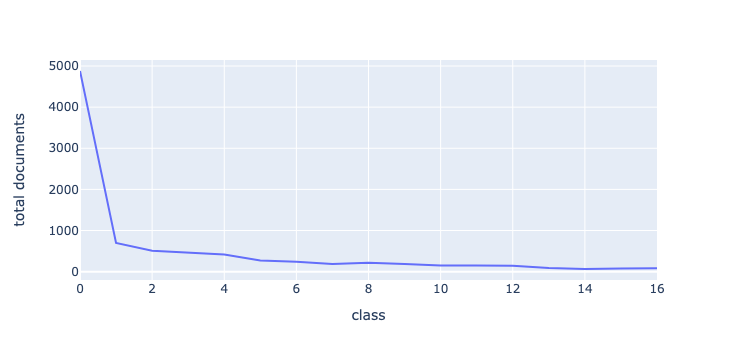

In [18]:
fig = px.line(total_docs, x="class", y="total documents")
fig.show()
fig.write_html('Bert_total_docs.html')

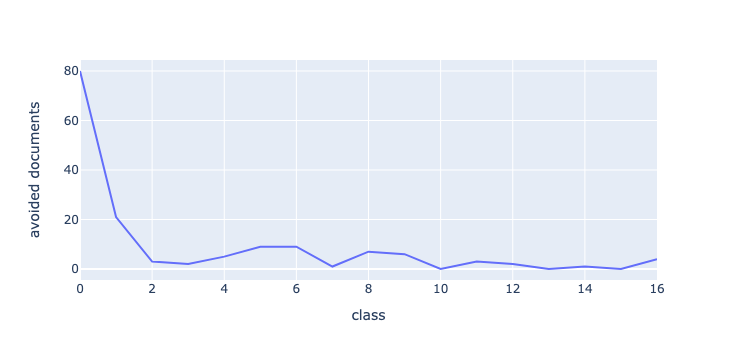

In [19]:
fig = px.line(avoided_docs, x="class", y="avoided documents")
fig.show()
fig.write_html('Bert_avoided_docs.html')

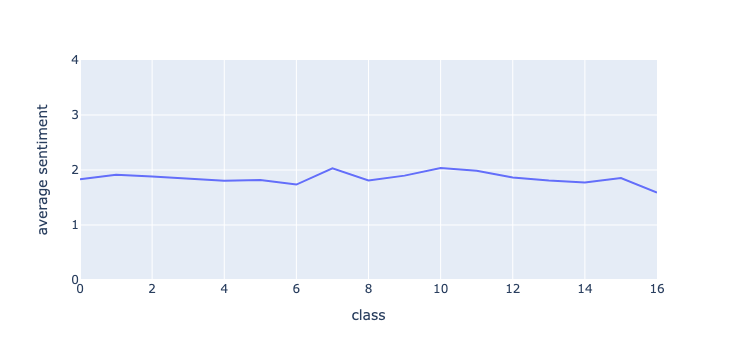

In [20]:
fig = px.line(avg_sentiment, x="class", y="average sentiment")
fig.update_layout(yaxis_range=[0, 4])
fig.show()
fig.write_html('Bert_avg_sentiment.html')

In [21]:
# Year wise class count
clas_s = [i for i in range(16)]

for key, val in year_dict.items():
    temp = list(val.keys())
    for c in clas_s:
        if c not in temp:
            val[c] = 0
    year_dict[key] = val

for key, val in year_count.items():
    temp = list(val.keys())
    for c in clas_s:
        if c not in temp:
            val[c] = 0
    year_count[key] = val

In [22]:
tempKeys = sorted(year_count)
year_count = {i: year_count[i] for i in tempKeys}

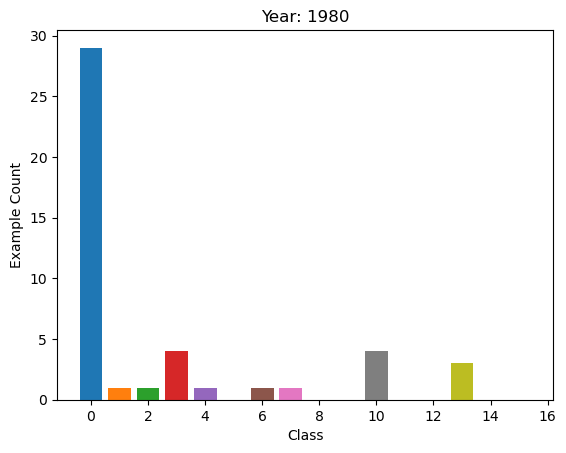

Should I show next Year:  Y


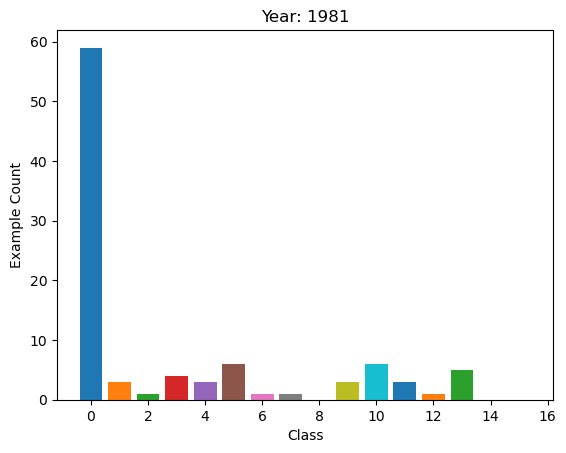

Should I show next Year:  Y


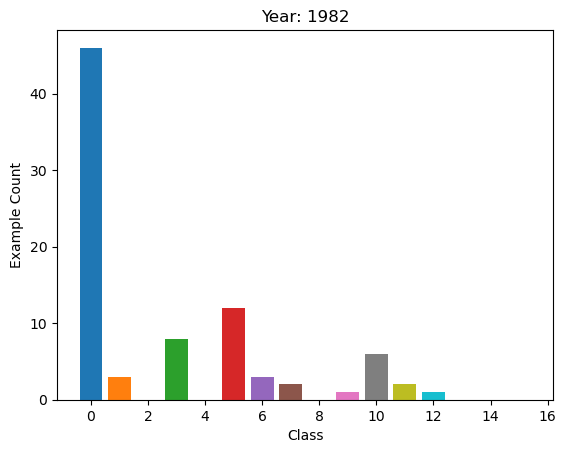

Should I show next Year:  Y


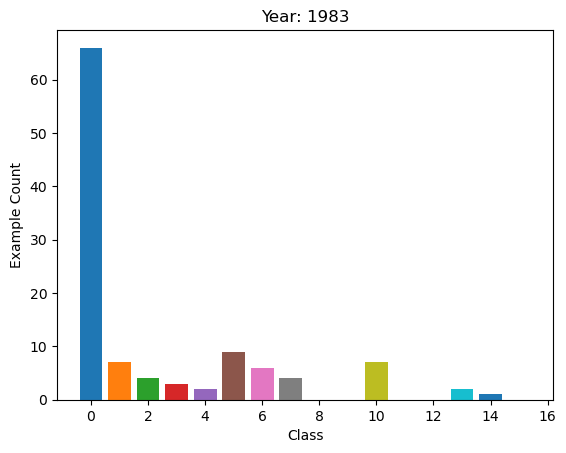

Should I show next Year:  Y


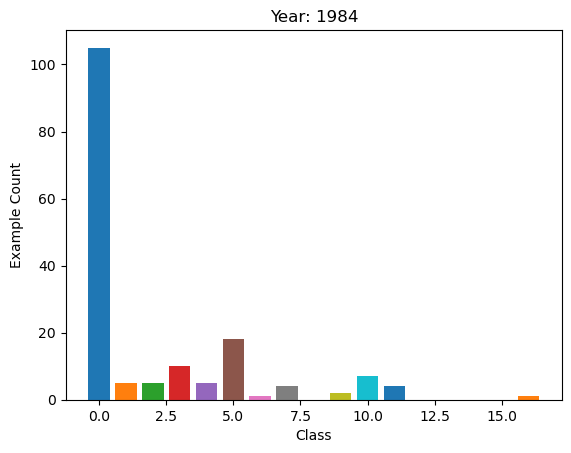

Should I show next Year:  Y


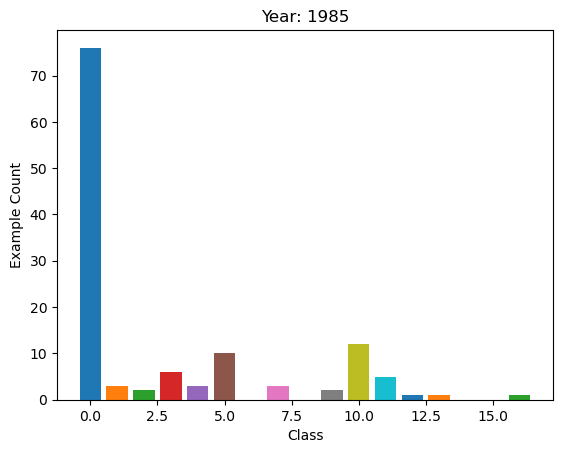

Should I show next Year:  Y


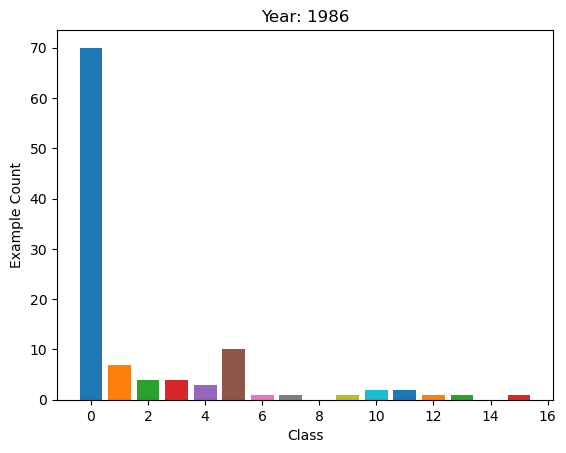

Should I show next Year:  Y


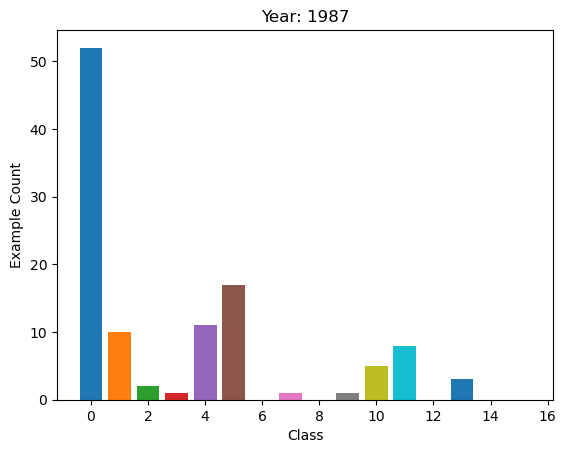

Should I show next Year:  Y


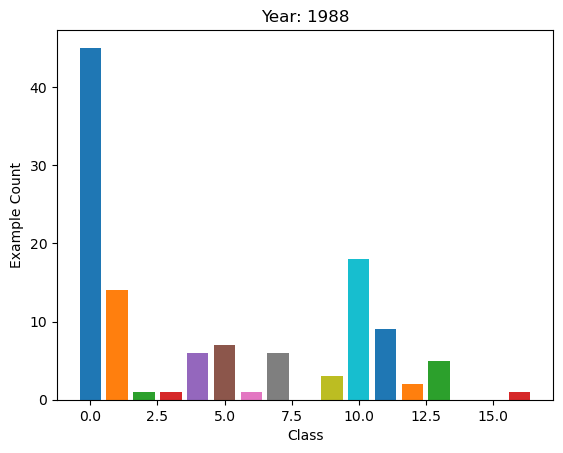

Should I show next Year:  Y


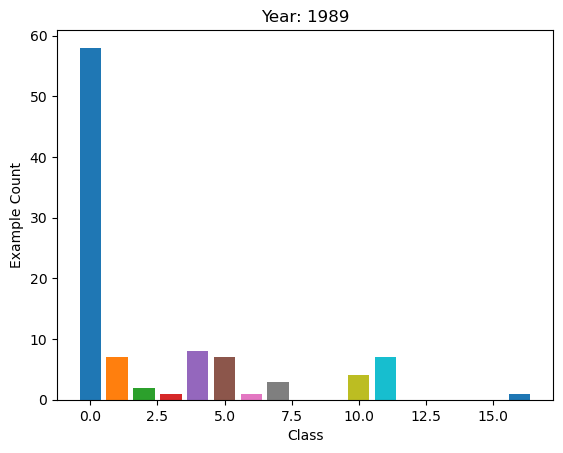

Should I show next Year:  Y


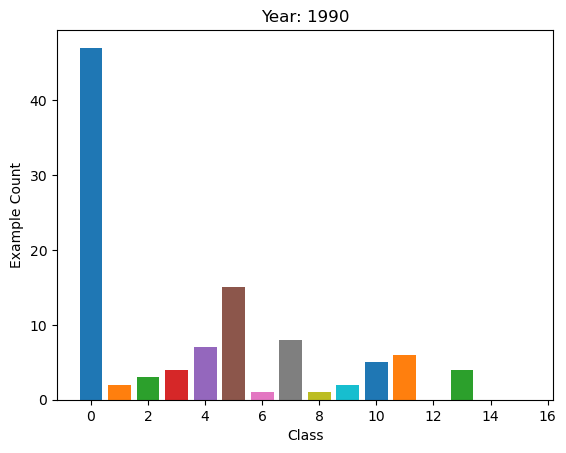

Should I show next Year:  Y


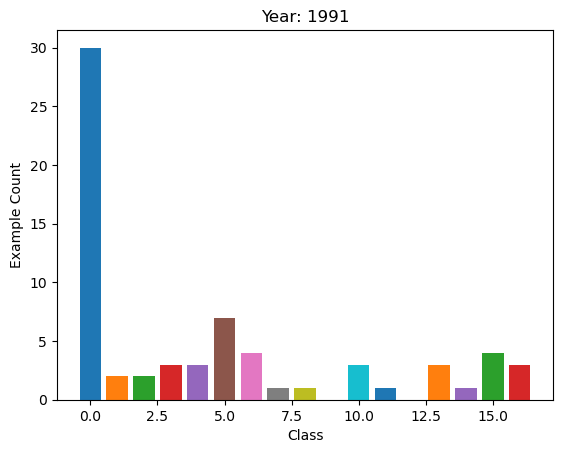

Should I show next Year:  Y


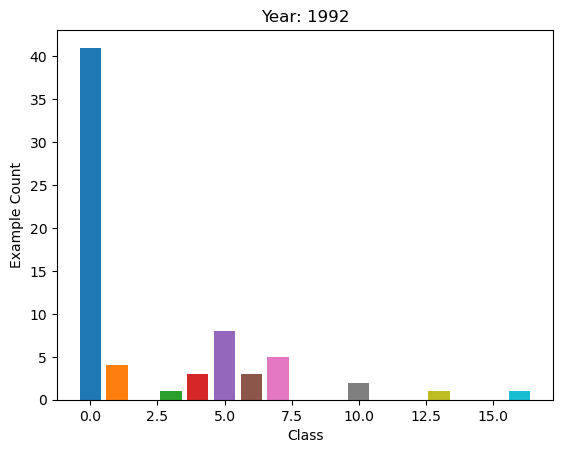

Should I show next Year:  Y


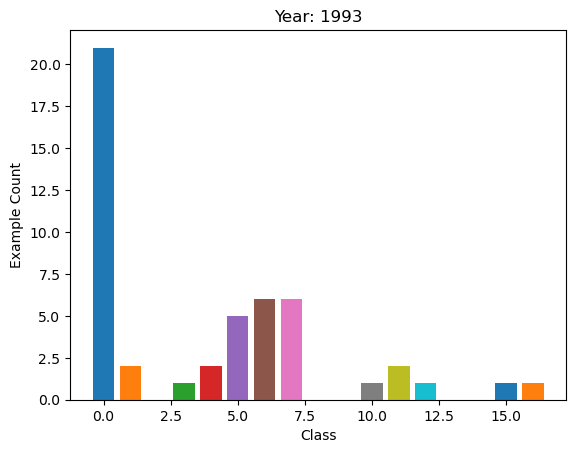

Should I show next Year:  Y


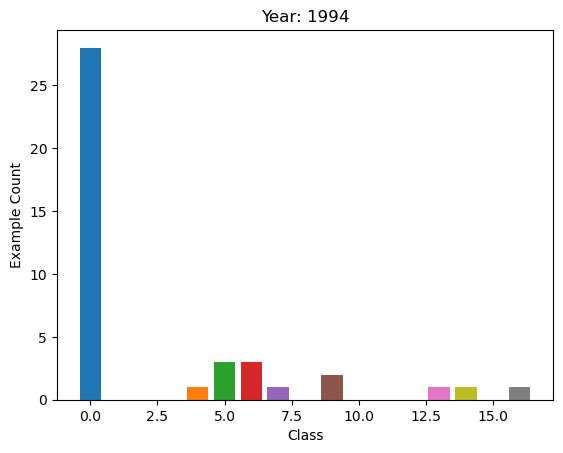

Should I show next Year:  Y


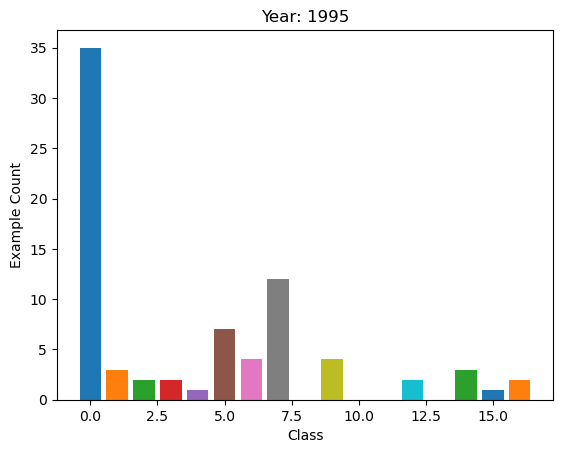

Should I show next Year:  Y


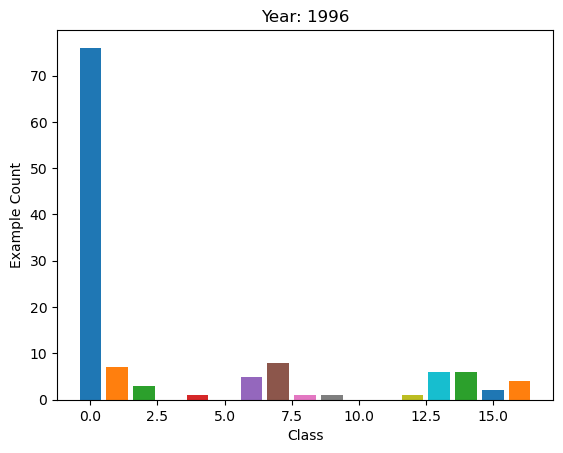

Should I show next Year:  Y


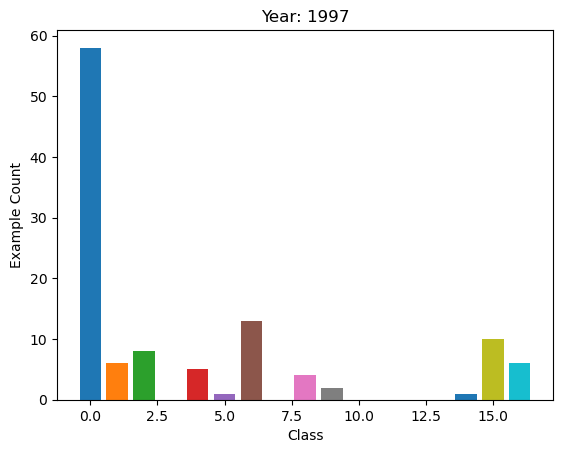

Should I show next Year:  Y


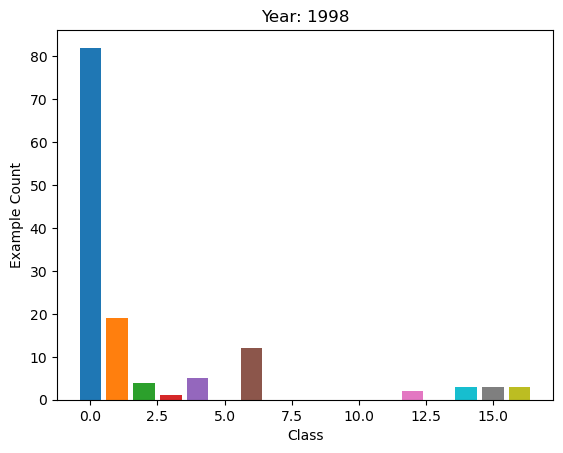

Should I show next Year:  Y


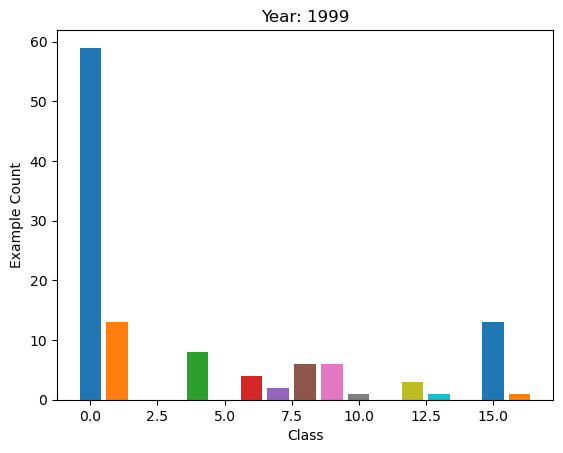

Should I show next Year:  Y


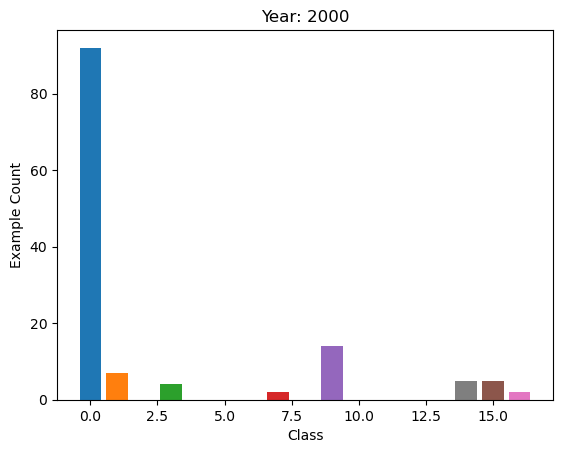

Should I show next Year:  Y


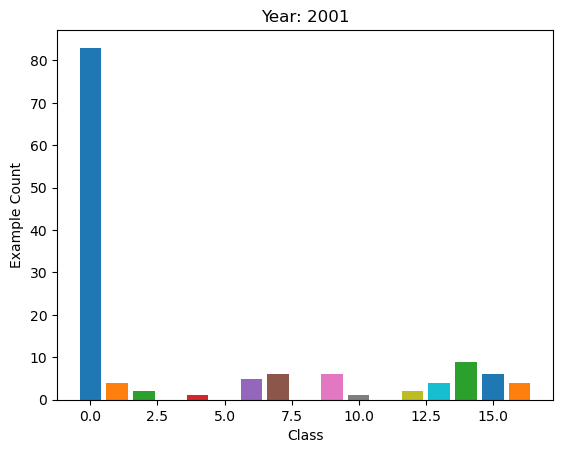

Should I show next Year:  Y


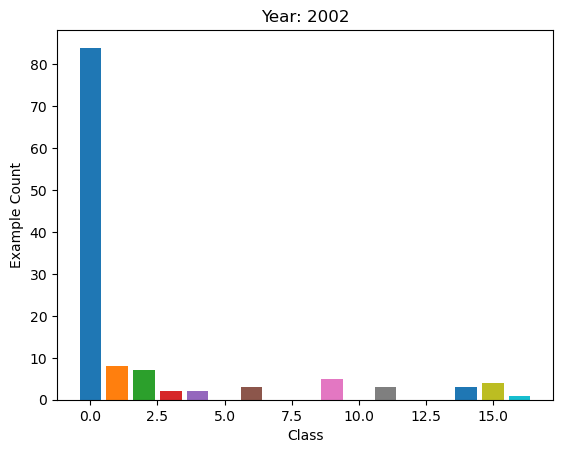

Should I show next Year:  Y


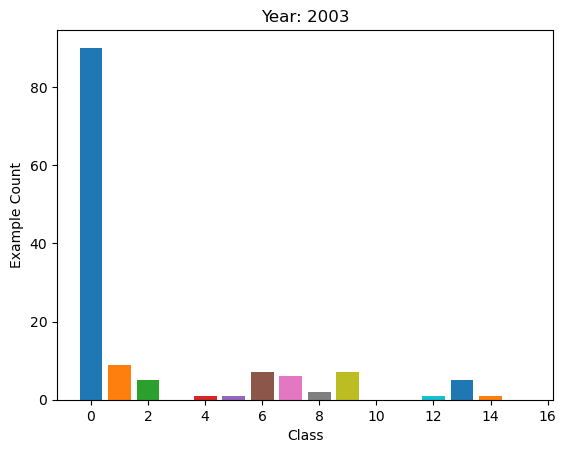

Should I show next Year:  Y


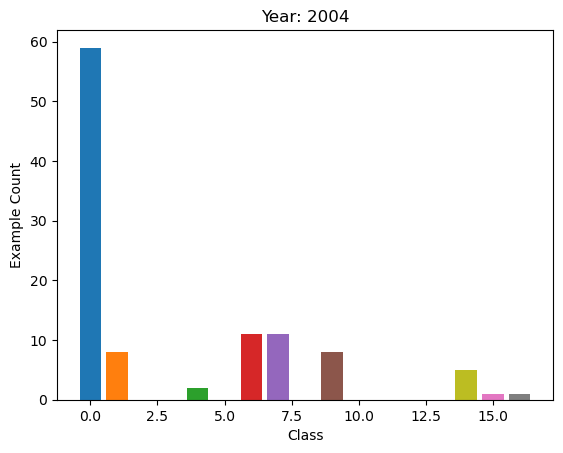

Should I show next Year:  Y


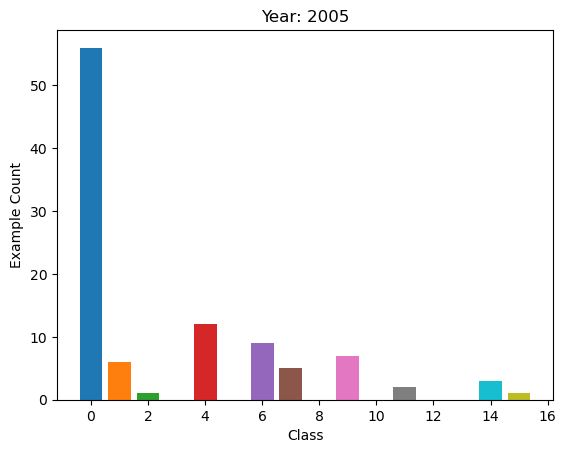

Should I show next Year:  Y


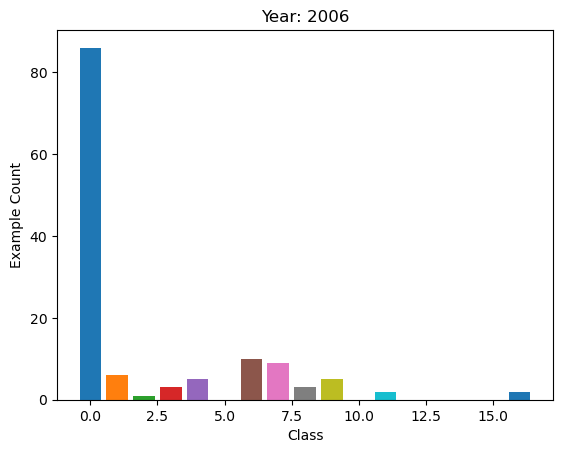

Should I show next Year:  Y


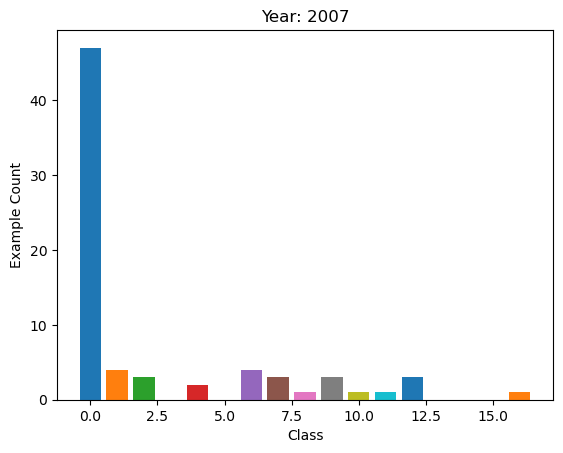

Should I show next Year:  Y


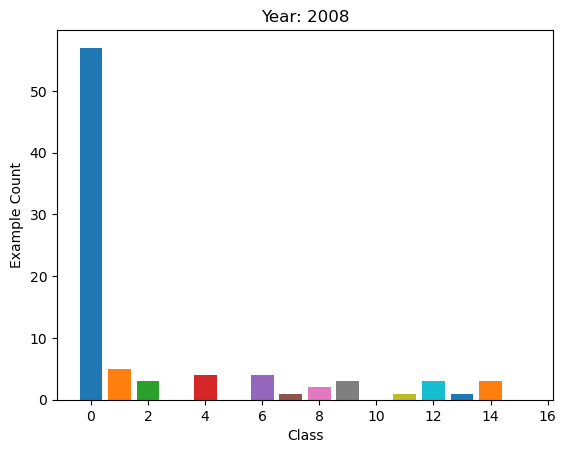

Should I show next Year:  Y


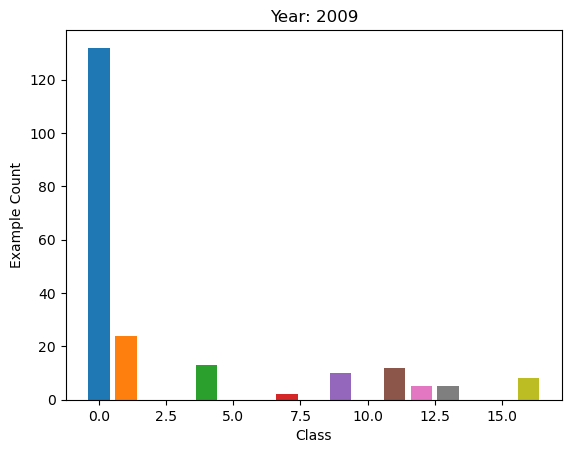

Should I show next Year:  Y


<Figure size 640x480 with 0 Axes>

In [23]:
# year wise histogram
flag = False
for key, val in year_count.items():
    for k, v in year_count[key].items():
        plt.bar(k, v)
    plt.xlabel('Class')
    plt.ylabel('Example Count')
    plt.title('Year: ' + str(key))
    plt.show()
    plt.savefig(str(key)+'_class_wise_count.png')
    user_prompt = input("Should I show next Year: ")
    if not flag:
        if user_prompt == 'Y':
            continue
        elif user_prompt == 'N':
            break
        else:
            flag = True
    else:
        continue

In [24]:
tempKeys = sorted(year_dict)
year_dict = {i: year_dict[i] for i in tempKeys}

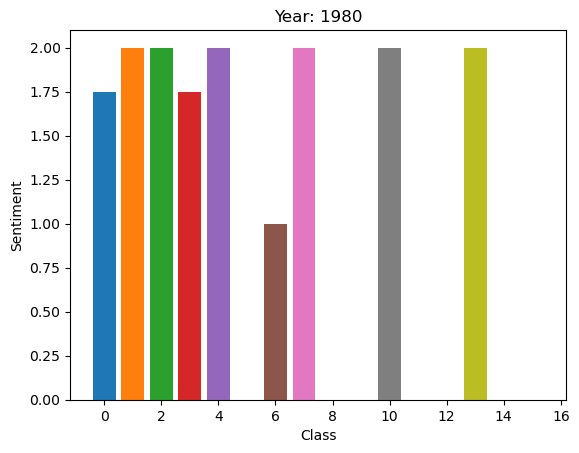

Should I show next Year:  Y


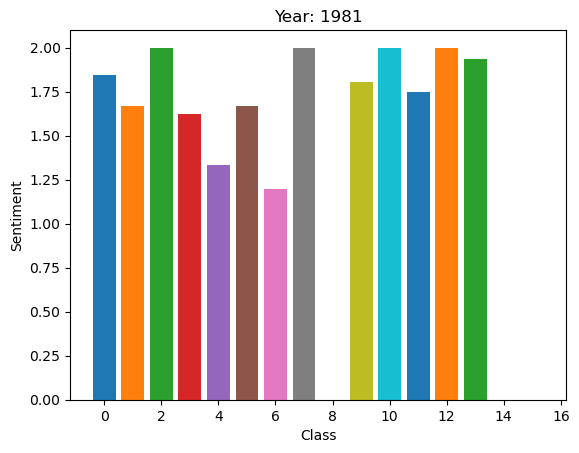

Should I show next Year:  Y


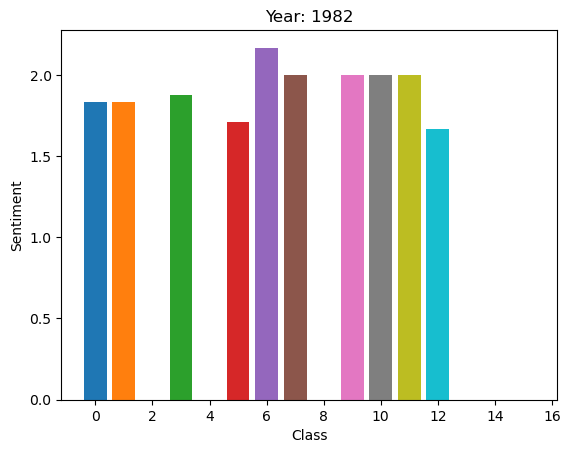

Should I show next Year:  Y


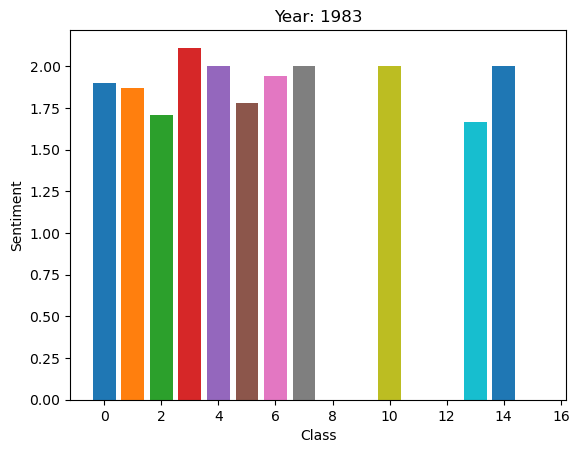

Should I show next Year:  Y


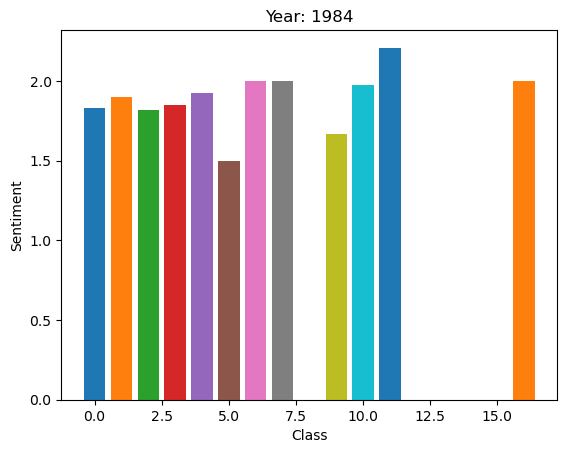

Should I show next Year:  Y


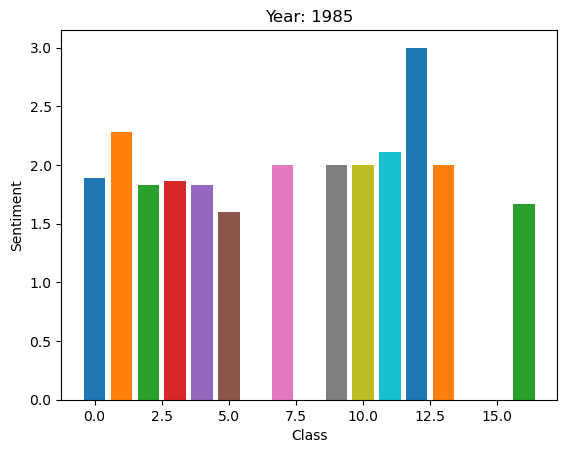

Should I show next Year:  Y


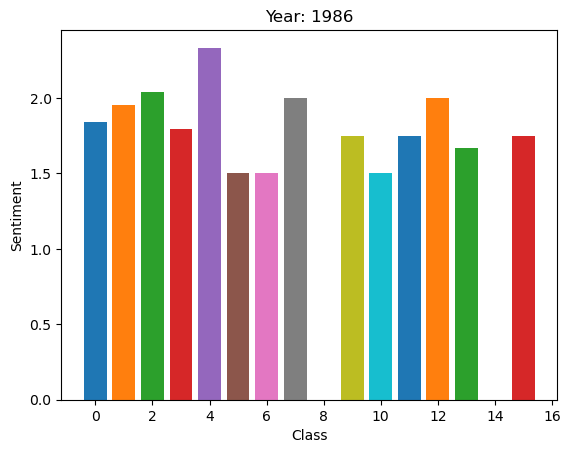

Should I show next Year:  Y


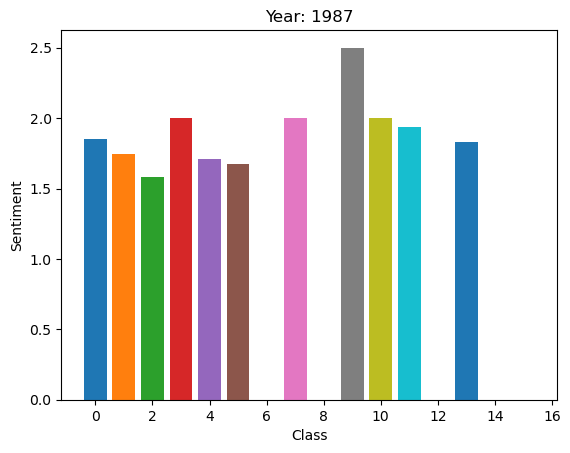

Should I show next Year:  Y


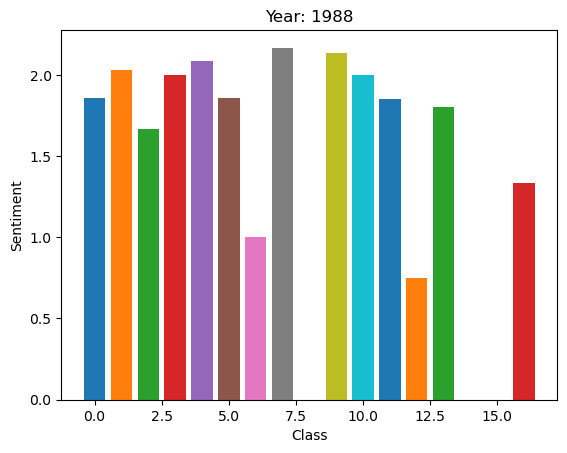

Should I show next Year:  Y


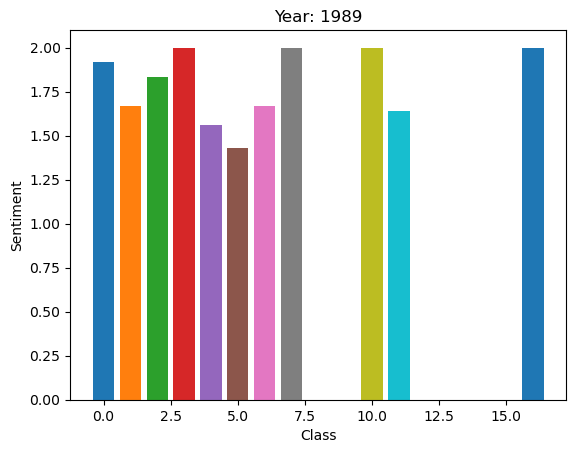

Should I show next Year:  Y


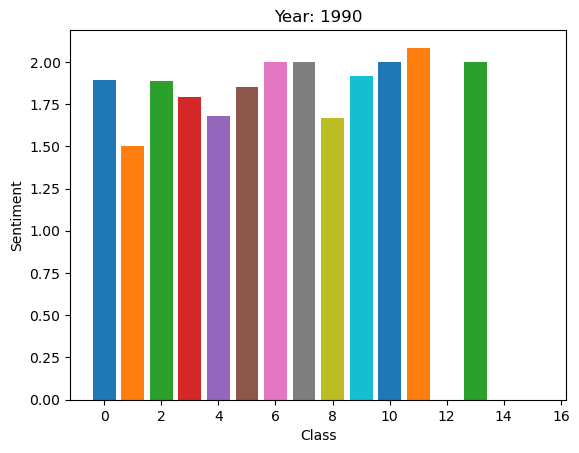

Should I show next Year:  Y


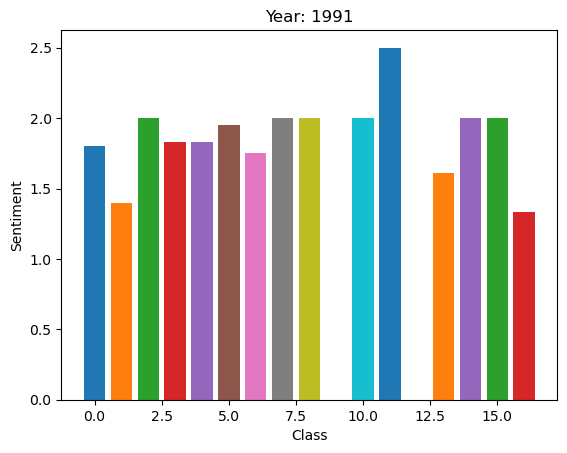

Should I show next Year:  Y


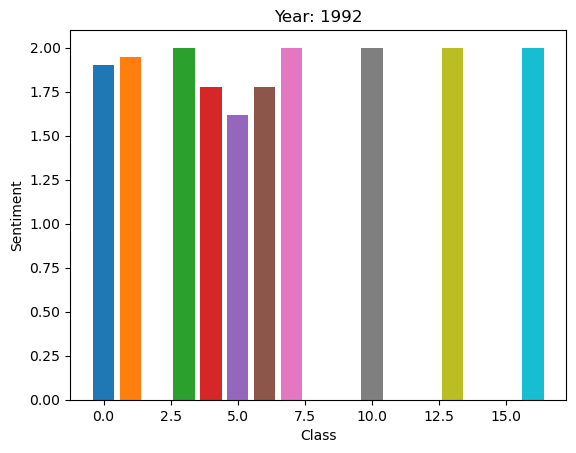

Should I show next Year:  Y


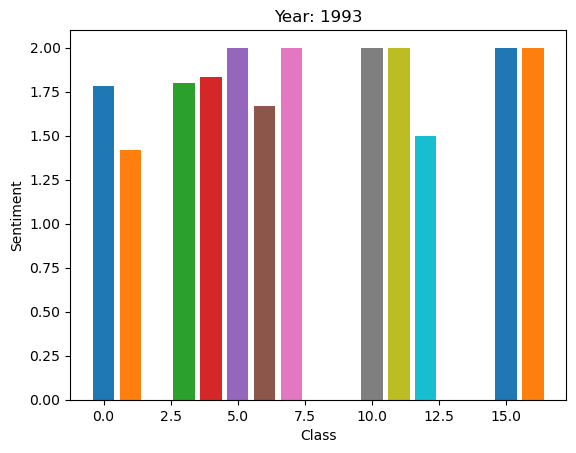

Should I show next Year:  Y


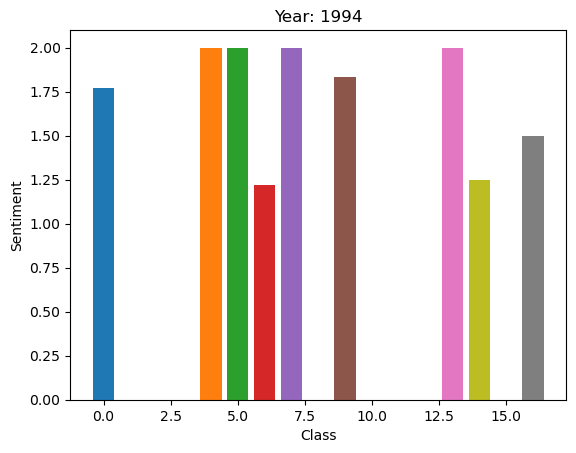

Should I show next Year:  Y


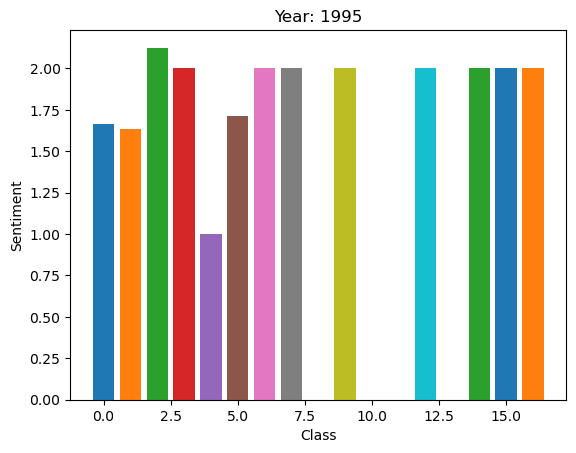

Should I show next Year:  Y


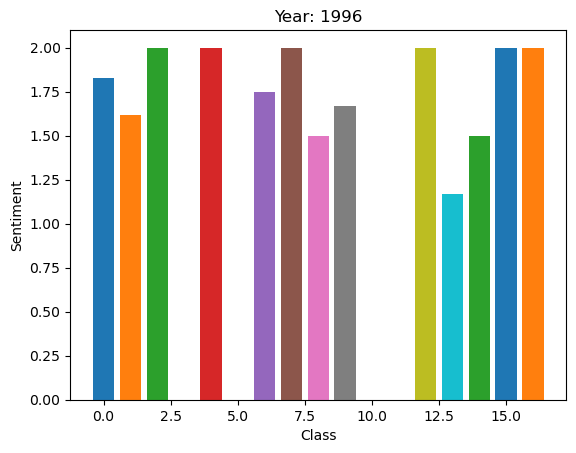

Should I show next Year:  Y


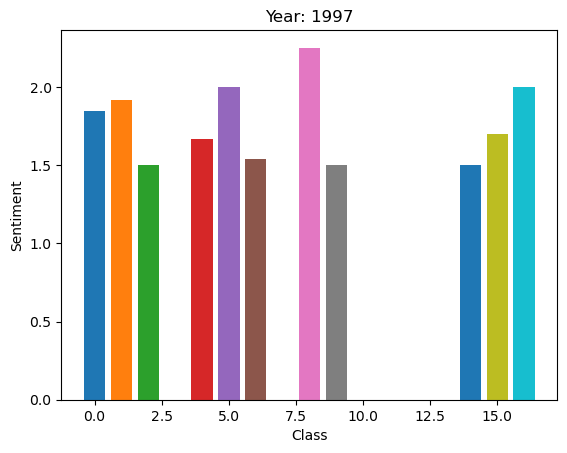

Should I show next Year:  Y


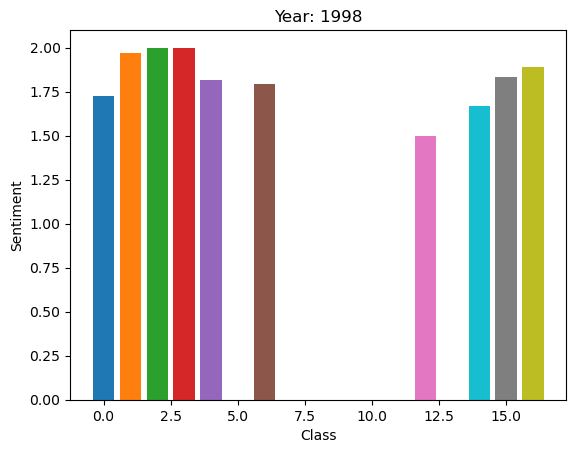

Should I show next Year:  Y


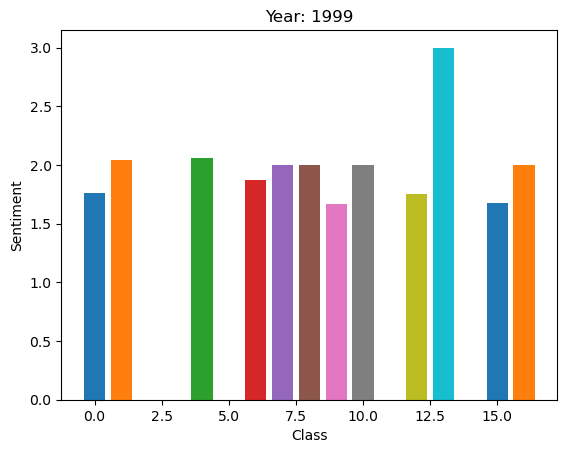

Should I show next Year:  Y


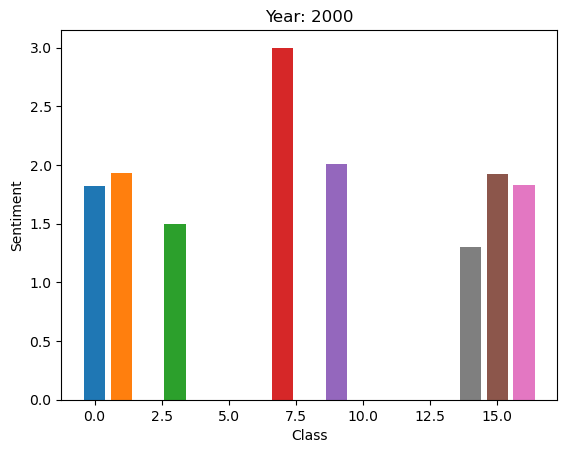

Should I show next Year:  Y


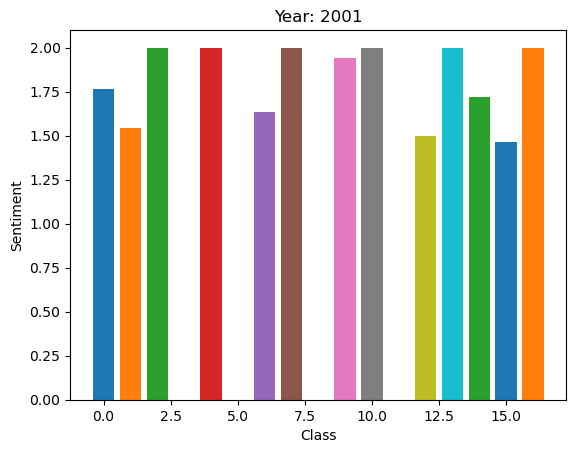

Should I show next Year:  Y


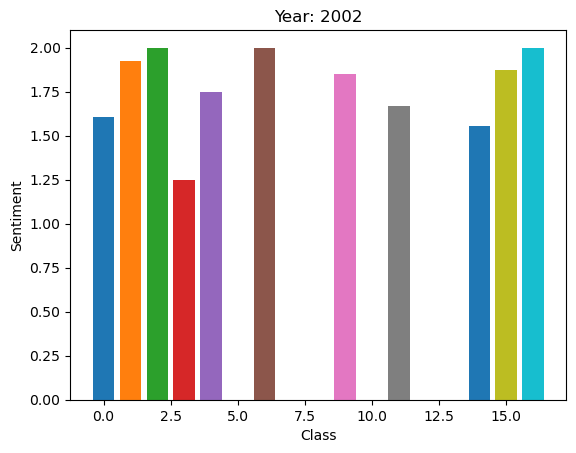

Should I show next Year:  Y


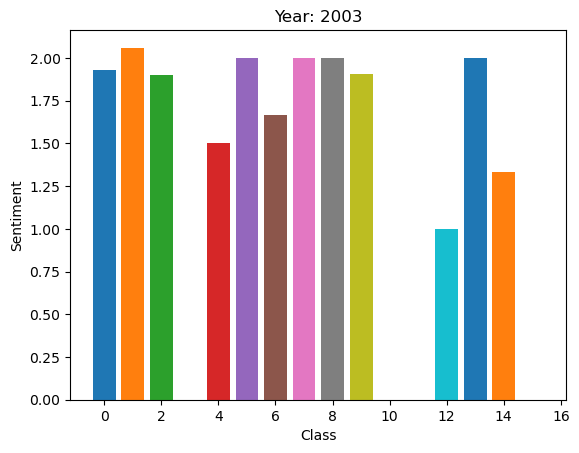

Should I show next Year:  Y


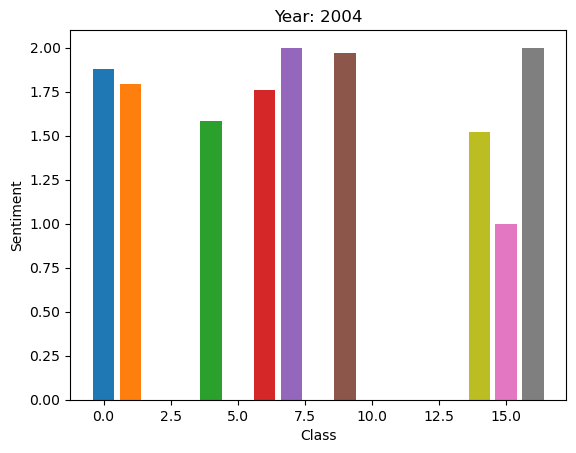

Should I show next Year:  Y


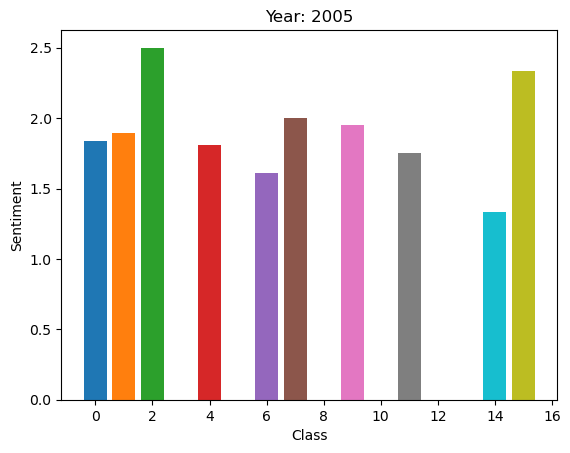

Should I show next Year:  Y


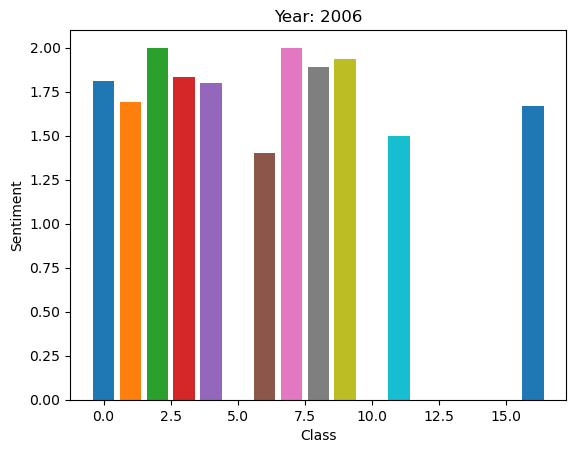

Should I show next Year:  Y


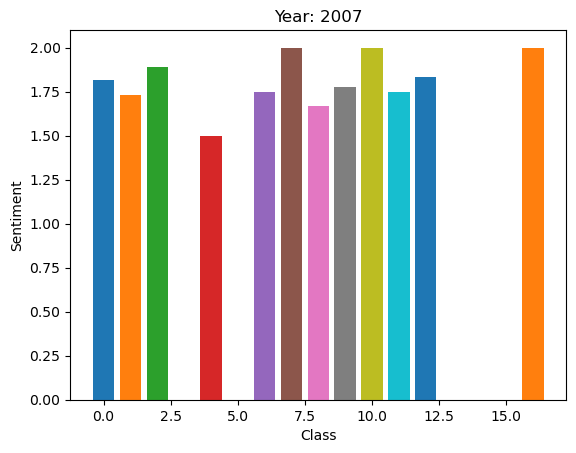

Should I show next Year:  Y


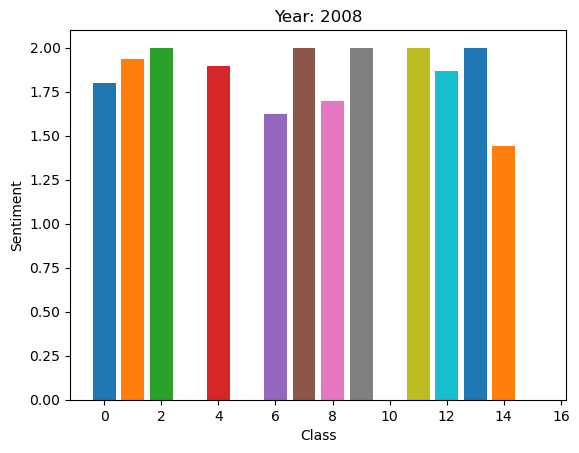

Should I show next Year:  Y


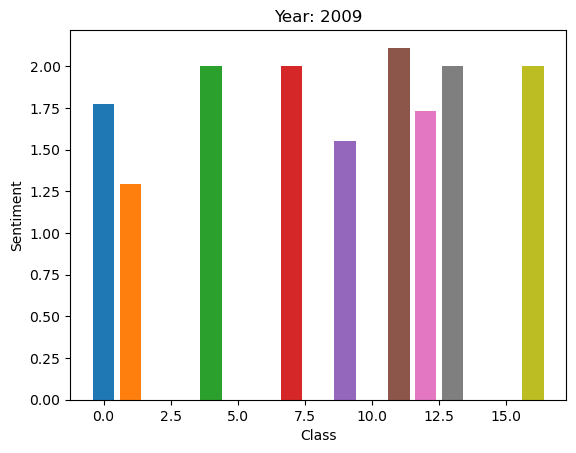

Should I show next Year:  Y


<Figure size 640x480 with 0 Axes>

In [25]:
# class wise sentiment
year_dict
# year wise histogram
flag = False
for key, val in year_dict.items():
    for k, v in year_dict[key].items():
        v1 = year_count[key][k]
        if v1 == 0:
            plt.bar(k, 0)
        else:
            plt.bar(k, v/v1)
    plt.xlabel('Class')
    plt.ylabel('Sentiment')
    plt.title('Year: ' + str(key))
    plt.show()
    plt.savefig(str(key)+'_class_wise_sentiment')
    user_prompt = input("Should I show next Year: ")
    if not flag:
        if user_prompt == 'Y':
            continue
        elif user_prompt == 'N':
            break
        else:
            flag = True
    else:
        continue

In [16]:
# function which plots graph for a class across a year
def class_sentiment_change_yearly(cls_, year_dict, year_count):
    data = {}
    count = {}
    for key, val in year_dict.items():
        data[key] = year_dict[key][cls_]
        count[key] = year_count[key][cls_]
    
    x = []
    y = []
    for key, val in data.items():
        if count[key]== 0:
            continue
        else:
            val = val / count[key]
        
        x.append(key)
        y.append(val)
    
    df = pd.DataFrame({'Year': x, 'Sentiment': y})
    
    # plt.plot(x, y)
    # plt.xlabel('Year')
    # plt.ylabel('Sentiment')
    # plt.title('Class: ' + str(cls_))
    # plt.show()
    fig = px.line(df, x="Year", y="Sentiment")
    fig.update_layout(yaxis_range=[0, 4])
    fig.show()
    return fig

Class 0


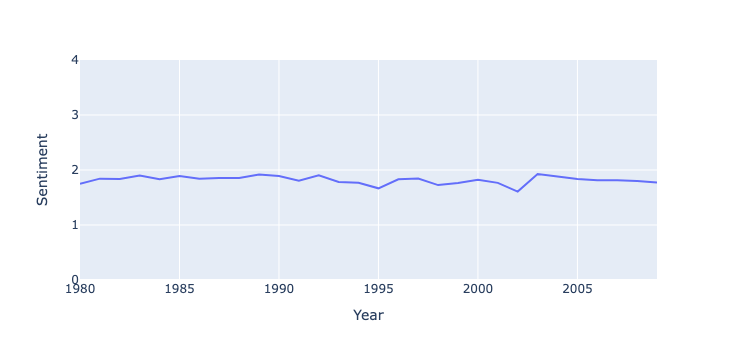

Class 1


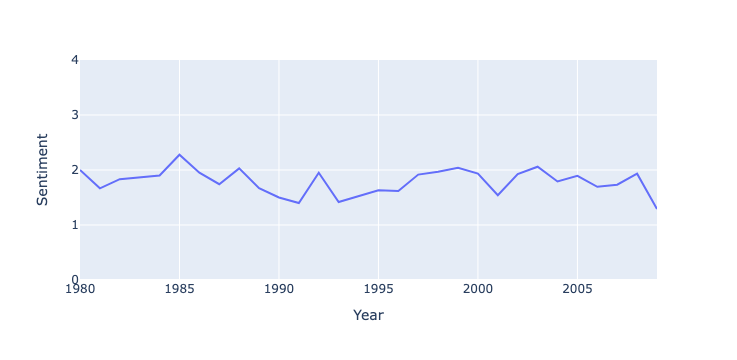

Class 2


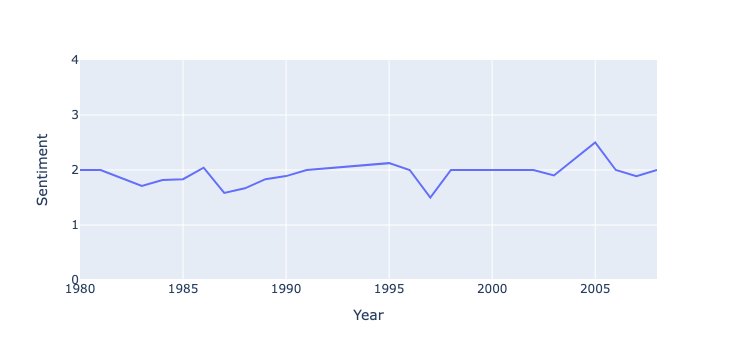

Class 3


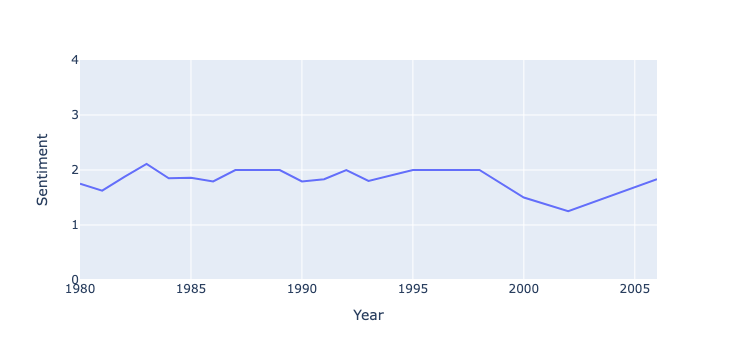

Class 4


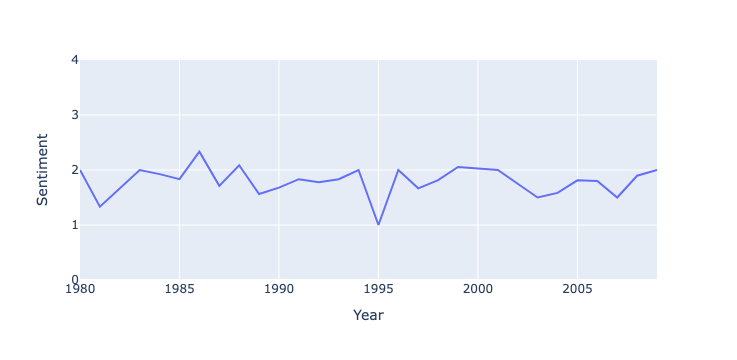

Class 5


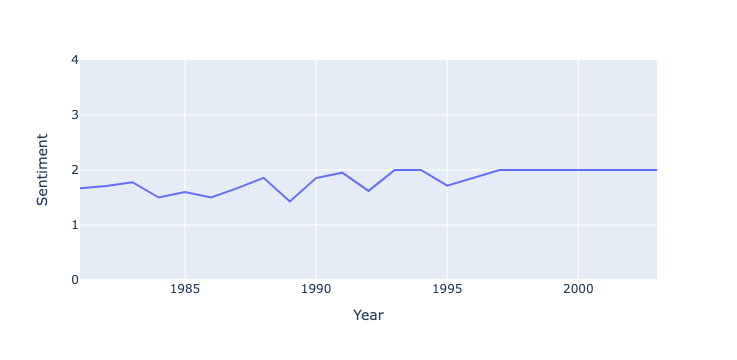

Class 6


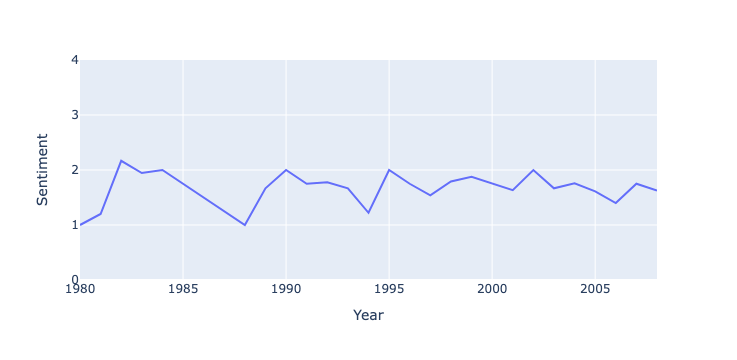

Class 7


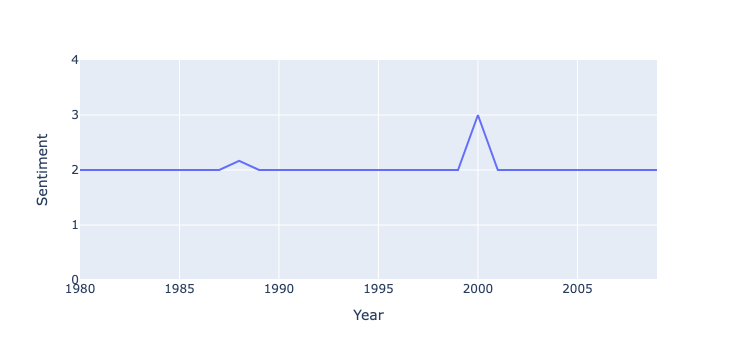

Class 8


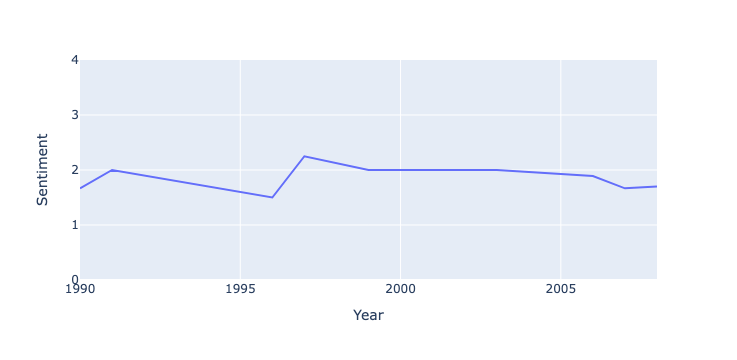

Class 9


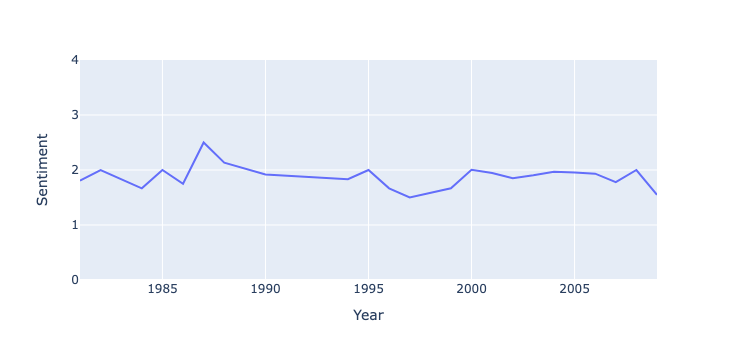

Class 10


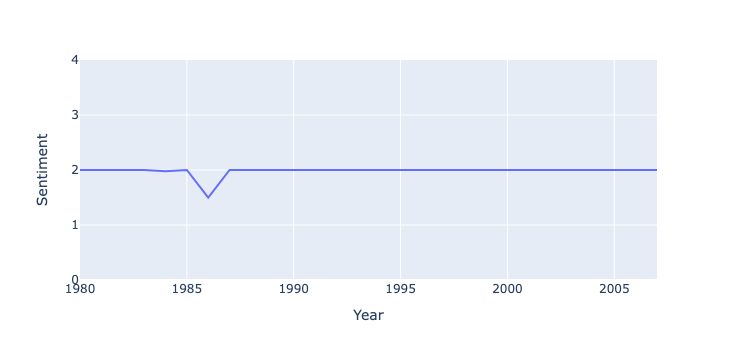

Class 11


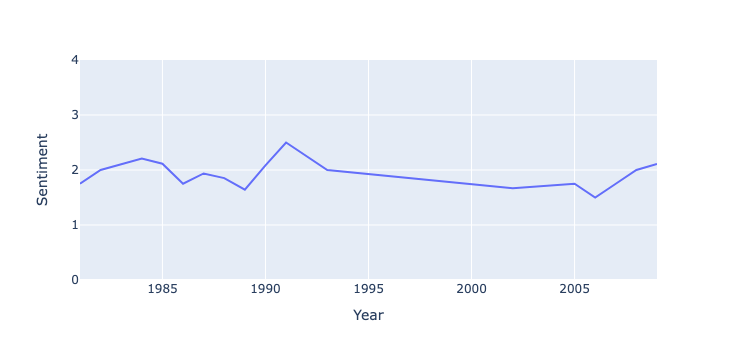

Class 12


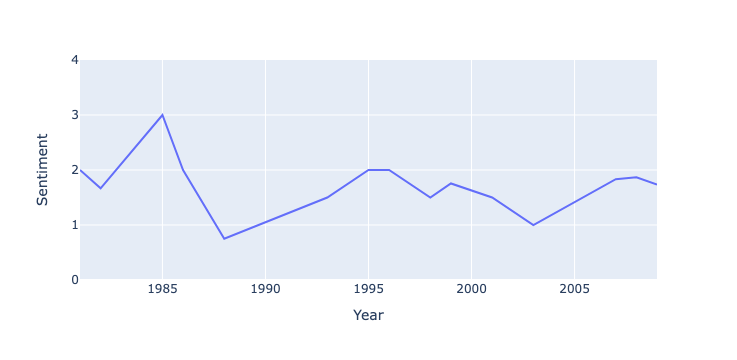

Class 13


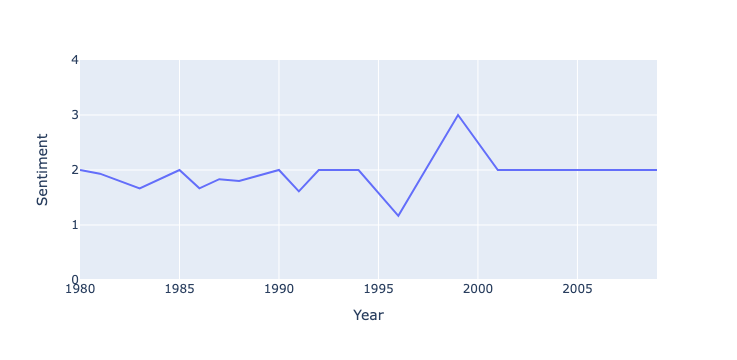

Class 14


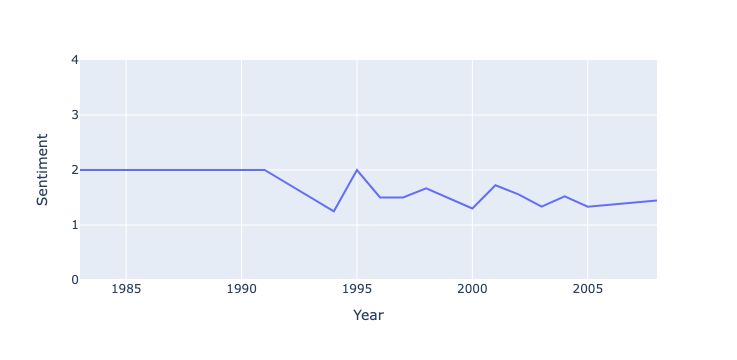

Class 15


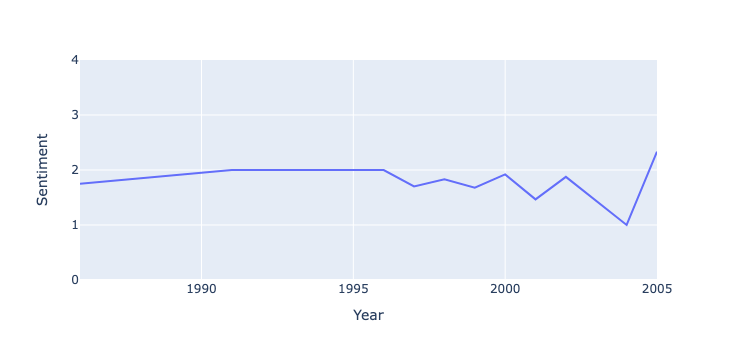

In [26]:
for i in range(16):
    print("Class " + str(i))
    fig = class_sentiment_change_yearly(i, year_dict, year_count)
    fig.write_html('class'+str(i)+'_yearly_sentiment_change.html')

#### Longformer

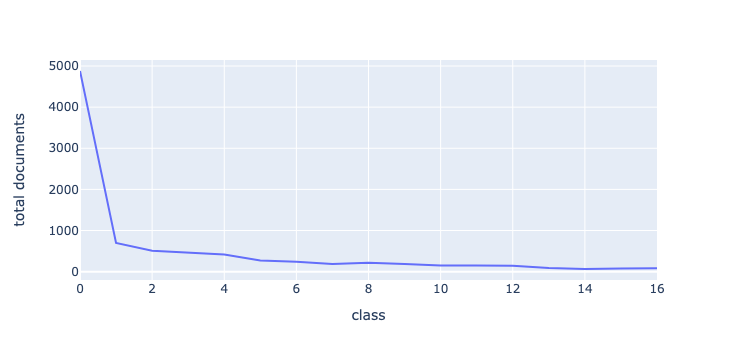

In [10]:
fig = px.line(total_docs, x="class", y="total documents")
fig.show()
fig.write_html('Longformer_total_docs.html')

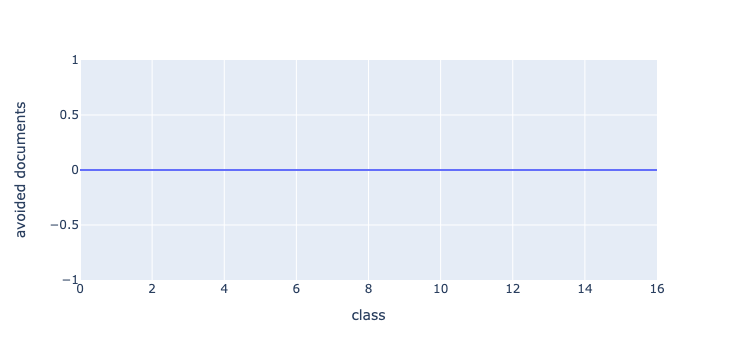

In [11]:
fig = px.line(avoided_docs, x="class", y="avoided documents")
fig.show()
fig.write_html('Longformer_avoided_docs.html')

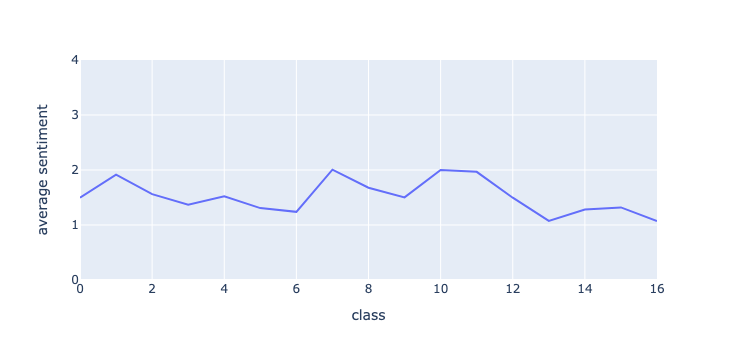

In [12]:
fig = px.line(avg_sentiment, x="class", y="average sentiment")
fig.update_layout(yaxis_range=[0, 4])
fig.show()
fig.write_html('Longformer_avg_sentiment.html')

In [13]:
# Year wise class count
clas_s = [i for i in range(16)]

for key, val in year_dict.items():
    temp = list(val.keys())
    for c in clas_s:
        if c not in temp:
            val[c] = 0
    year_dict[key] = val

for key, val in year_count.items():
    temp = list(val.keys())
    for c in clas_s:
        if c not in temp:
            val[c] = 0
    year_count[key] = val

In [14]:
tempKeys = sorted(year_count)
year_count = {i: year_count[i] for i in tempKeys}

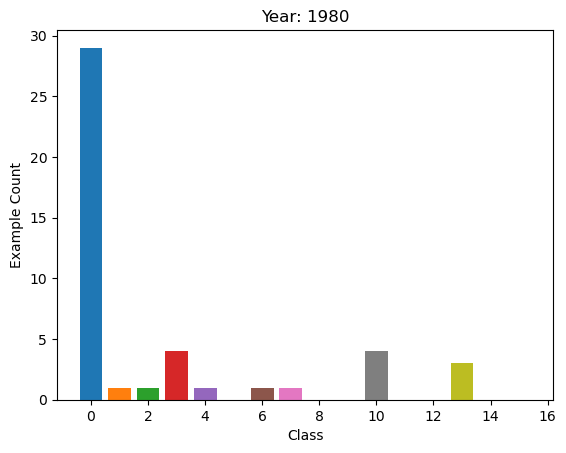

Should I show next Year:  Y


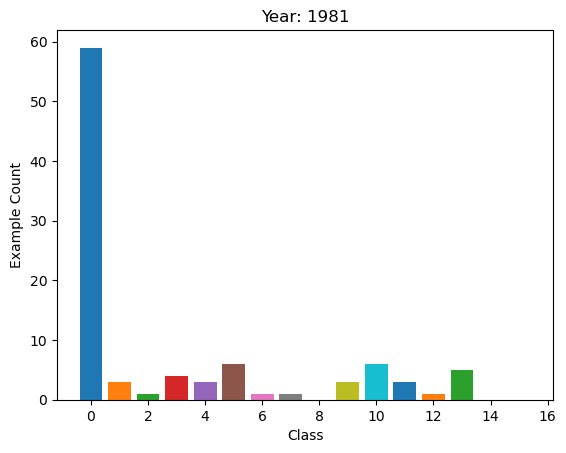

Should I show next Year:  Y


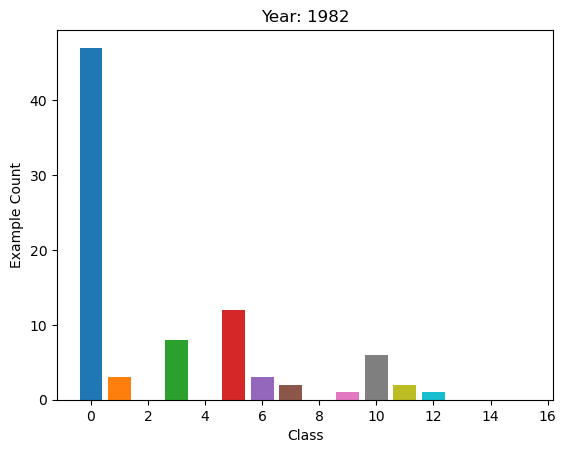

Should I show next Year:  Y


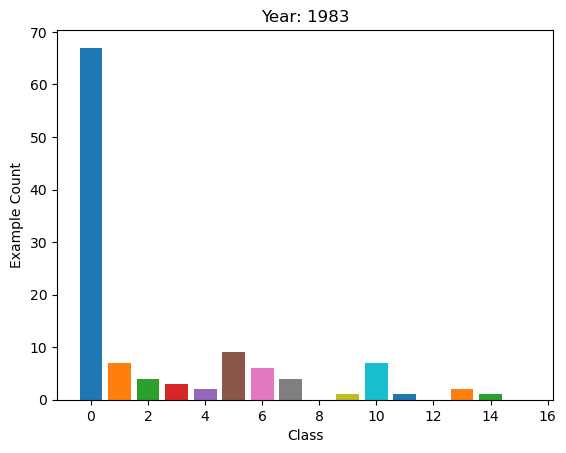

Should I show next Year:  Y


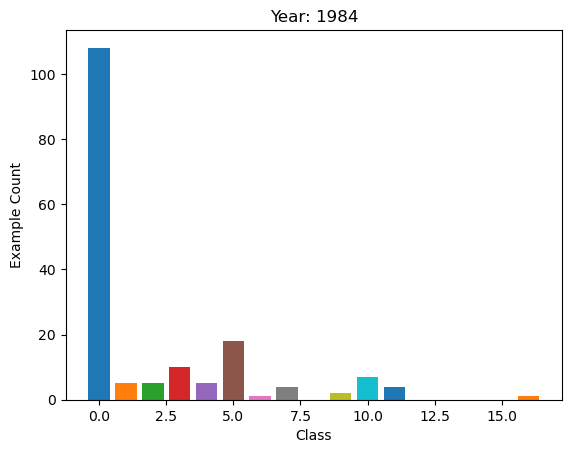

Should I show next Year:  Y


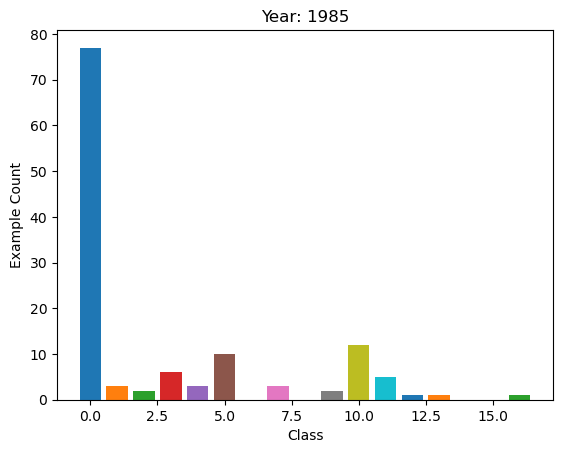

Should I show next Year:  Y


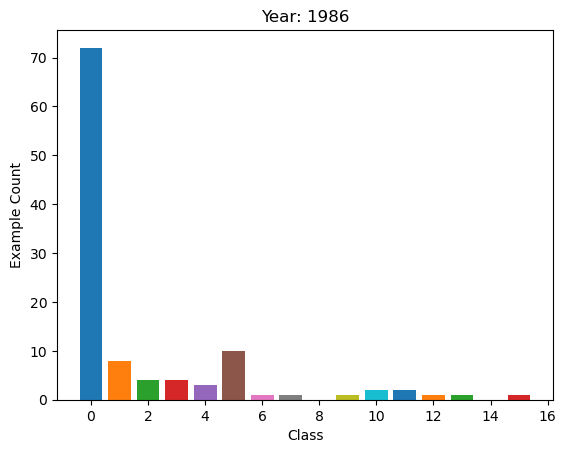

Should I show next Year:  Y


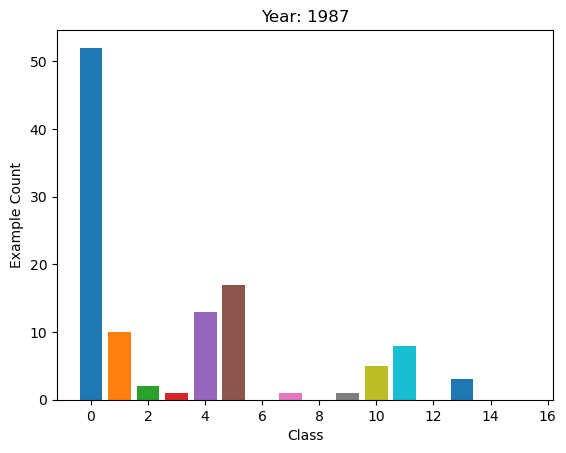

Should I show next Year:  Y


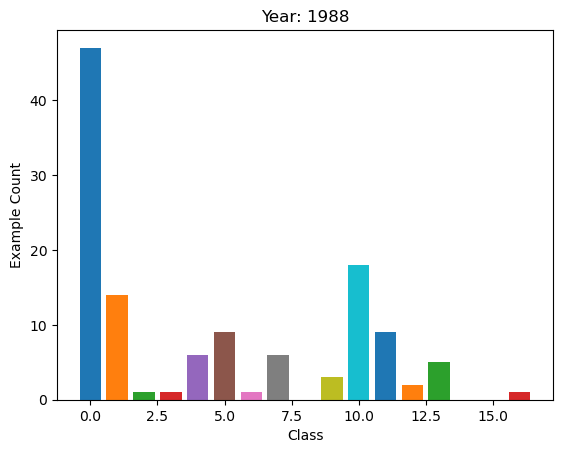

Should I show next Year:  Y


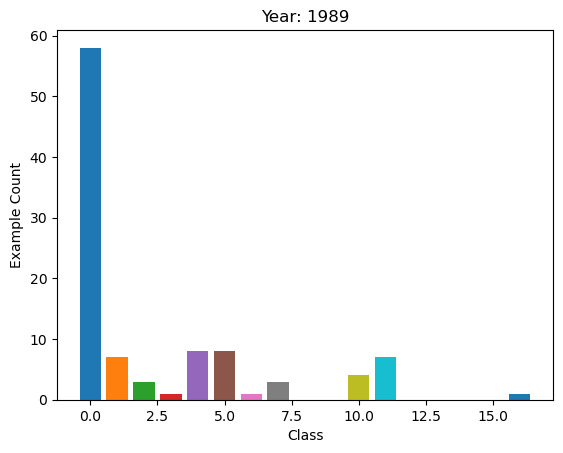

Should I show next Year:  Y


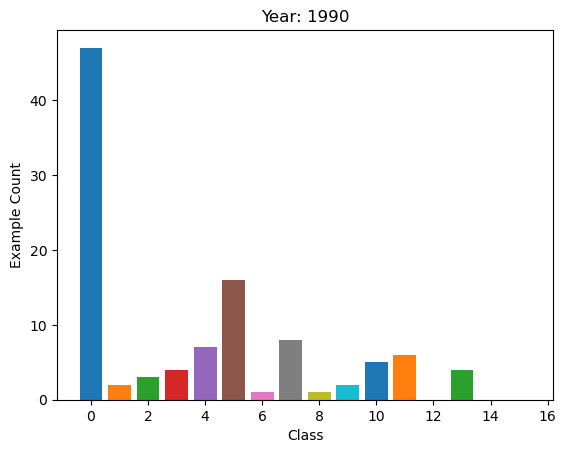

Should I show next Year:  Y


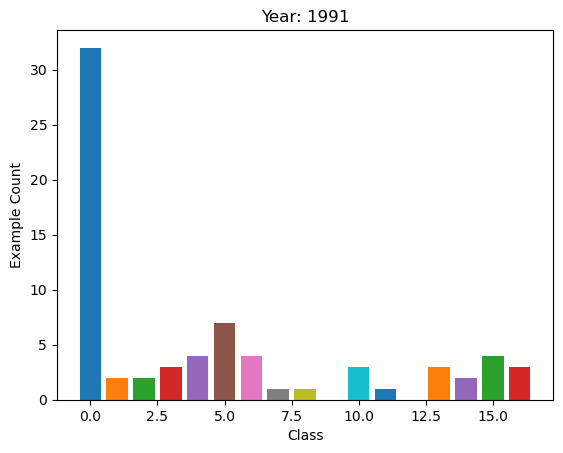

Should I show next Year:  Y


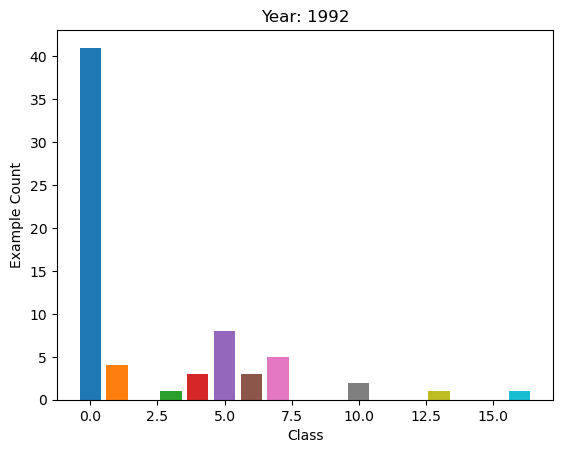

Should I show next Year:  Y


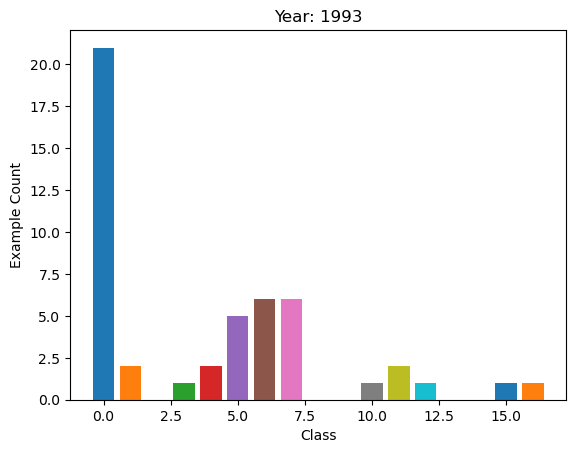

Should I show next Year:  Y


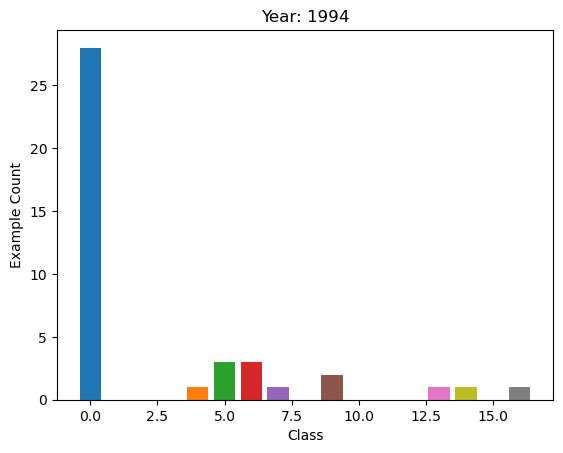

Should I show next Year:  Y


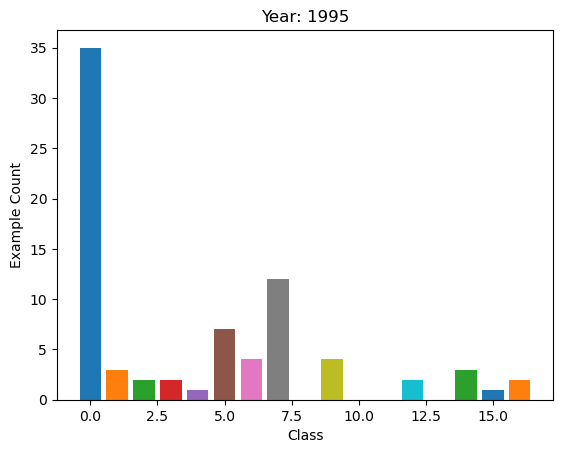

Should I show next Year:  Y


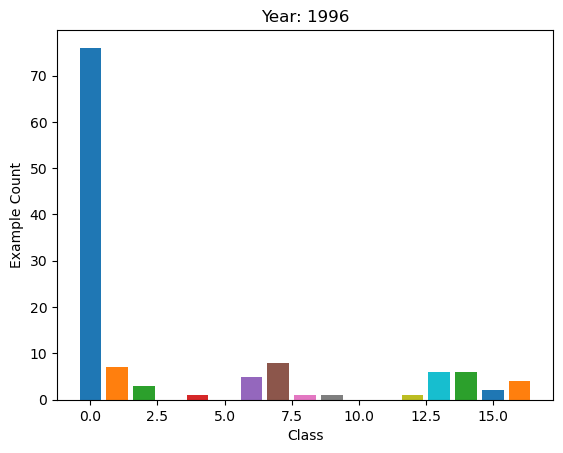

Should I show next Year:  Y


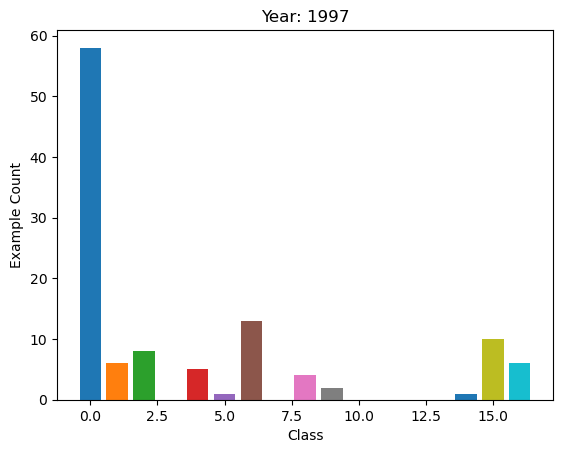

Should I show next Year:  Y


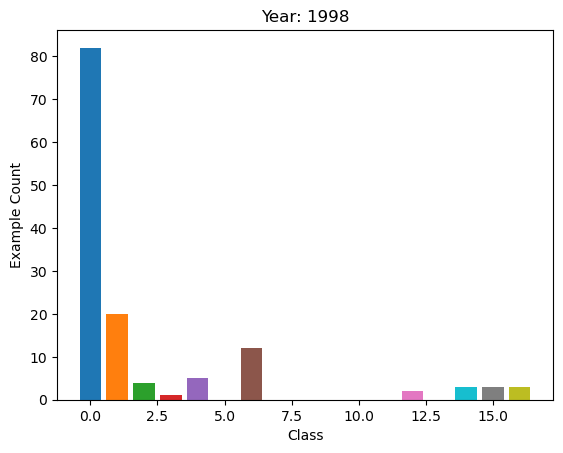

Should I show next Year:  Y


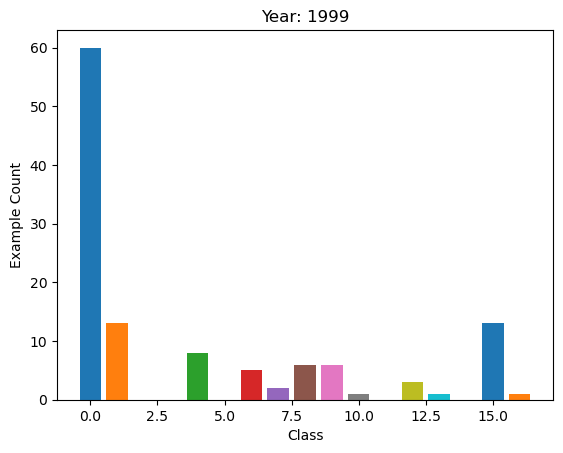

Should I show next Year:  Y


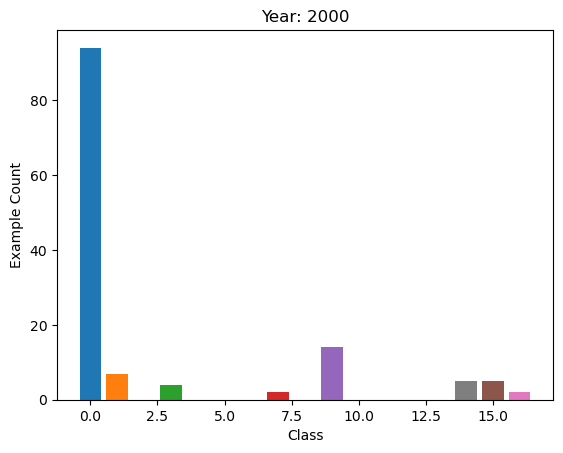

Should I show next Year:  Y


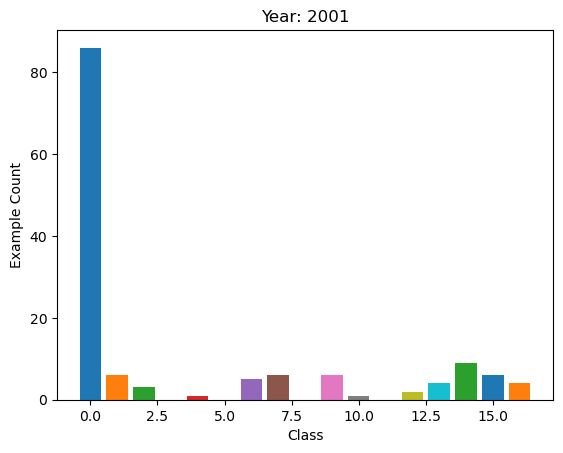

Should I show next Year:  Y


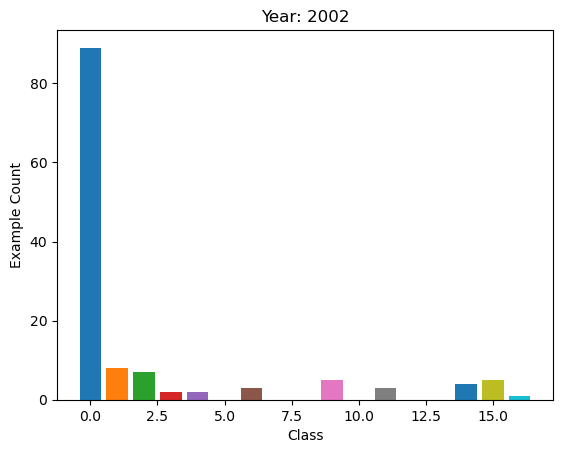

Should I show next Year:  Y


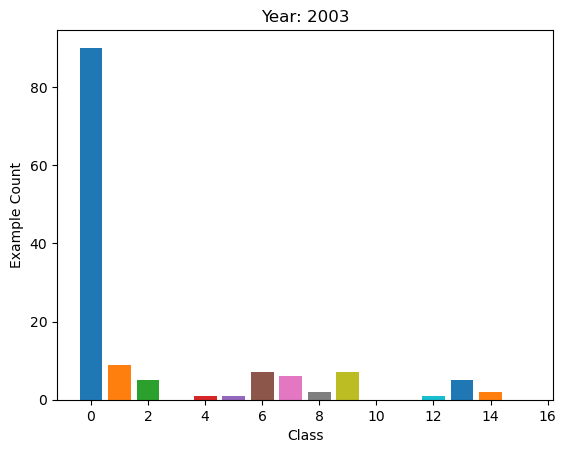

Should I show next Year:  Y


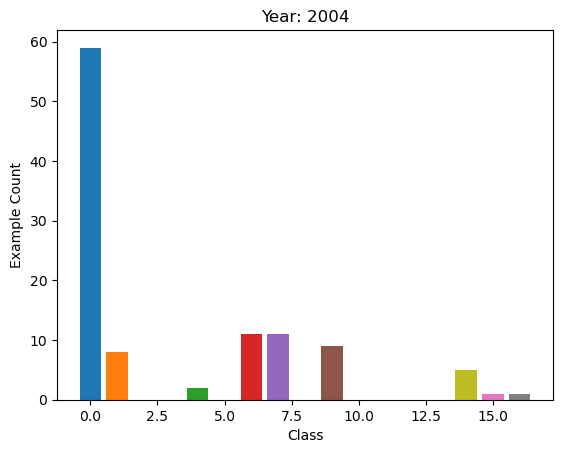

Should I show next Year:  Y


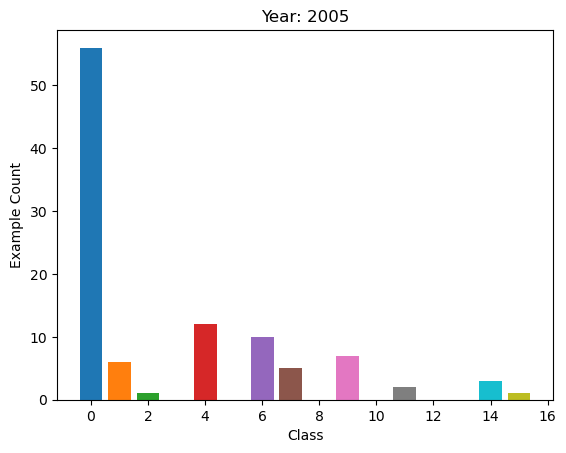

Should I show next Year:  Y


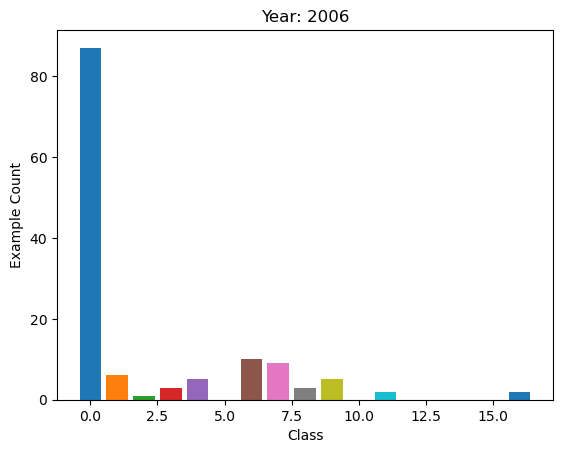

Should I show next Year:  Y


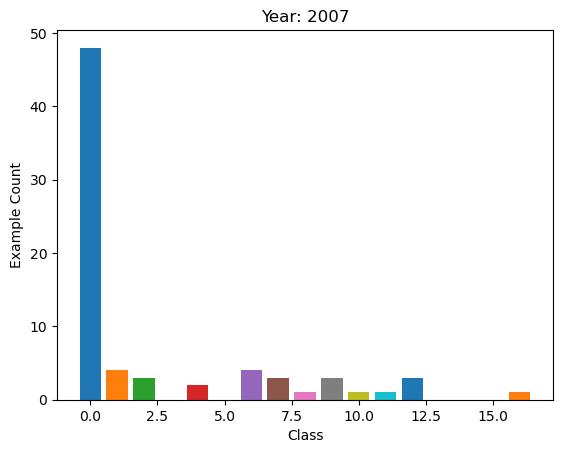

Should I show next Year:  Y


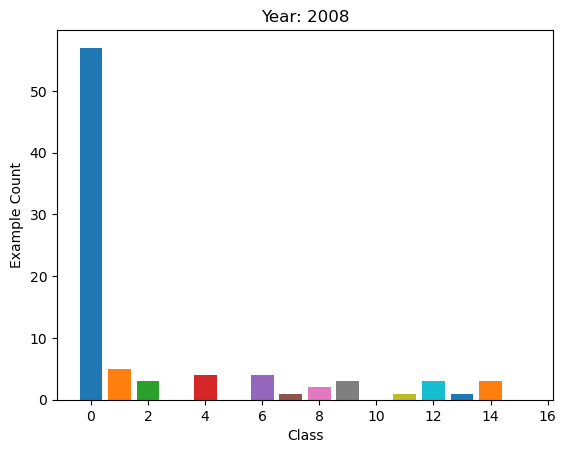

Should I show next Year:  Y


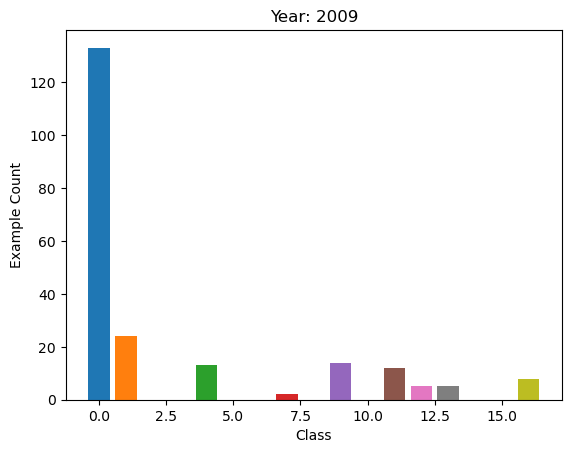

Should I show next Year:  Y


In [28]:
# year wise histogram
flag = False
for key, val in year_count.items():
    for k, v in year_count[key].items():
        plt.bar(k, v)
    plt.xlabel('Class')
    plt.ylabel('Example Count')
    plt.title('Year: ' + str(key))
    plt.savefig(str(key)+'_class_wise_count.png')
    plt.show()
    user_prompt = input("Should I show next Year: ")
    if not flag:
        if user_prompt == 'Y':
            continue
        elif user_prompt == 'N':
            break
        else:
            flag = True
    else:
        continue

In [29]:
tempKeys = sorted(year_dict)
year_dict = {i: year_dict[i] for i in tempKeys}

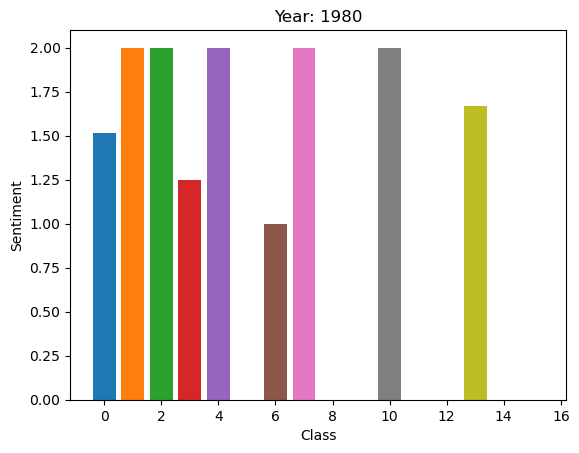

Should I show next Year:  Y


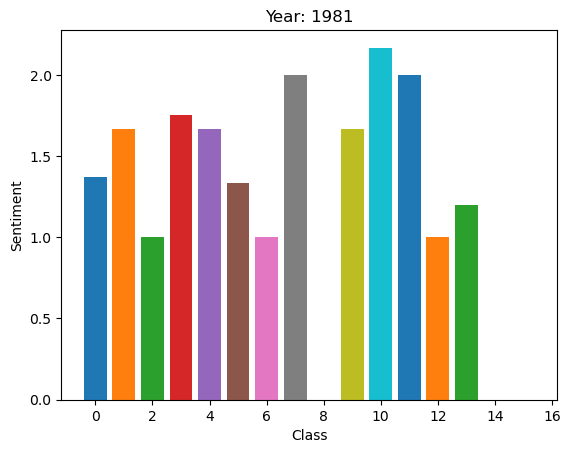

Should I show next Year:  Y


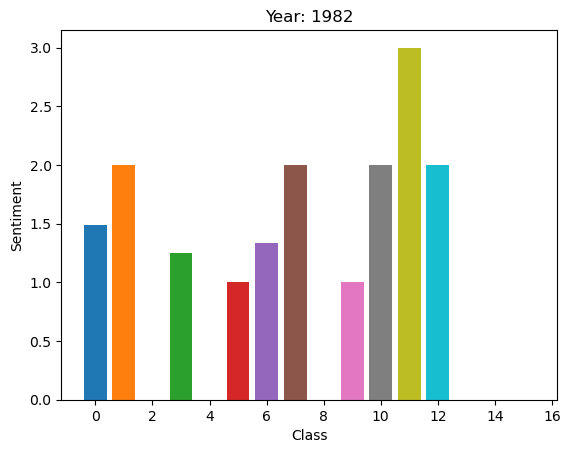

Should I show next Year:  Y


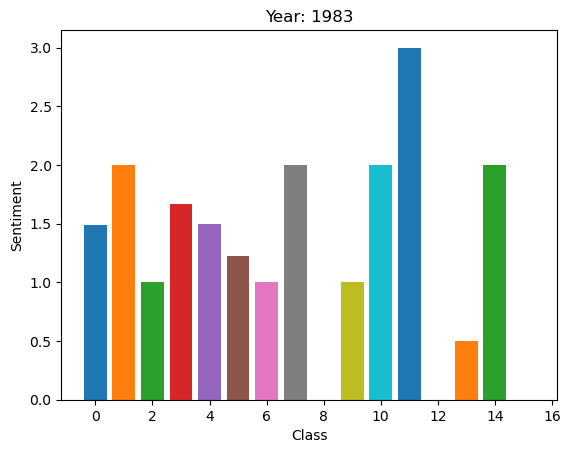

Should I show next Year:  Y


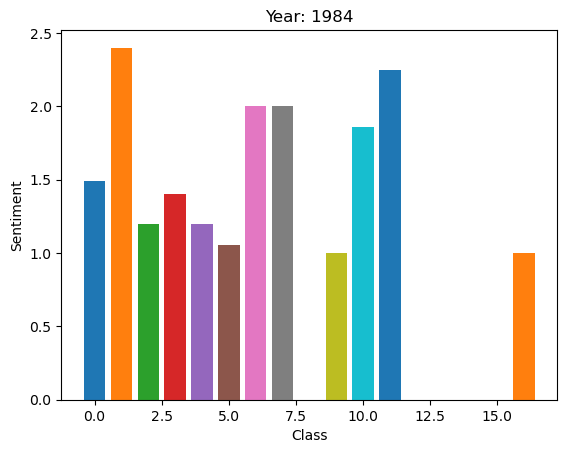

Should I show next Year:  Y


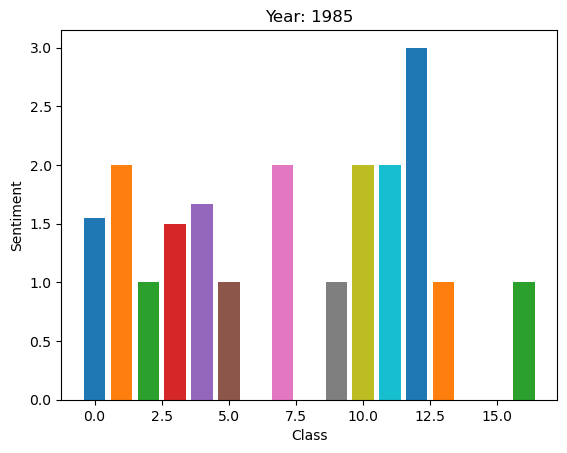

Should I show next Year:  Y


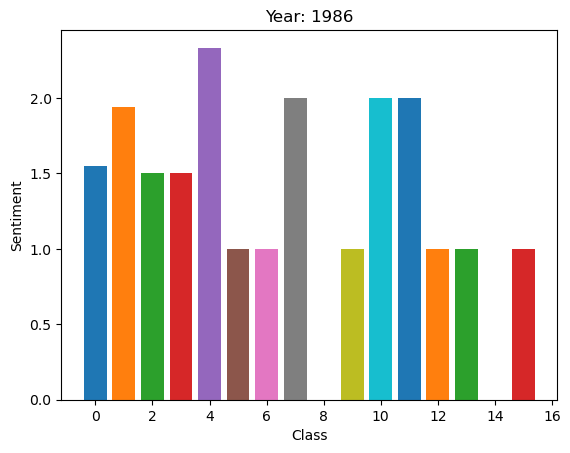

Should I show next Year:  Y


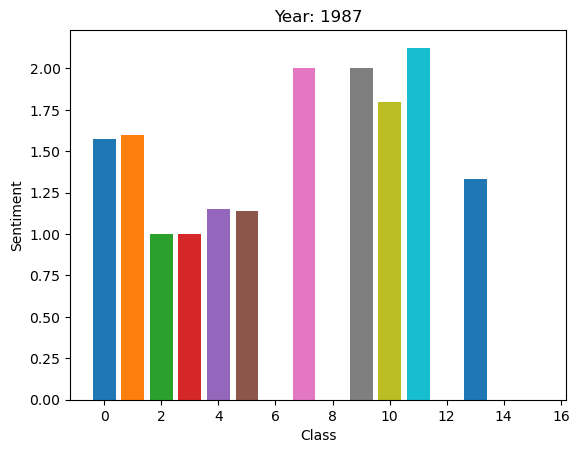

Should I show next Year:  Y


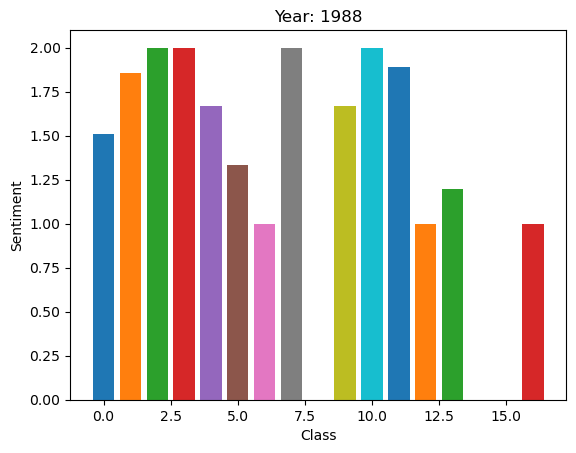

Should I show next Year:  Y


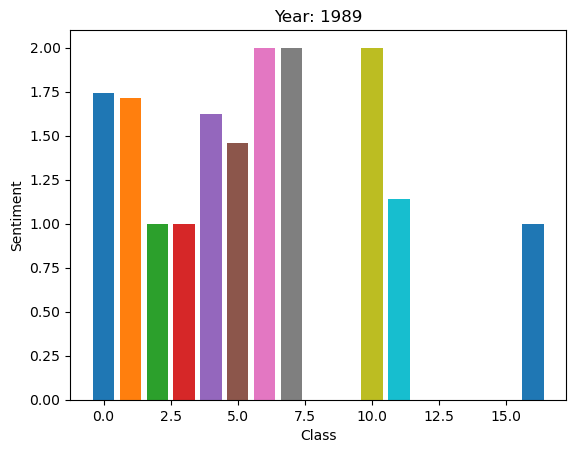

Should I show next Year:  Y


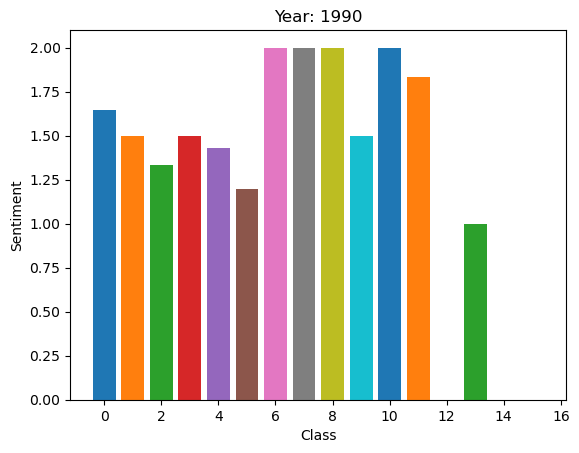

Should I show next Year:  Y


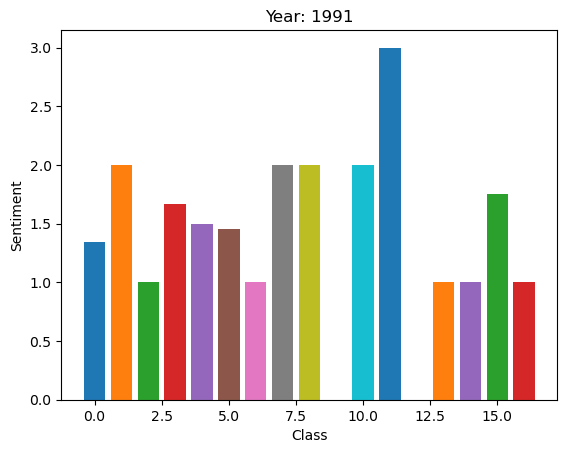

Should I show next Year:  Y


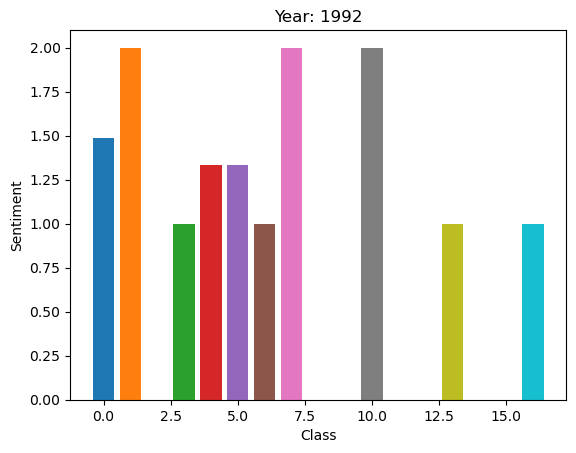

Should I show next Year:  Y


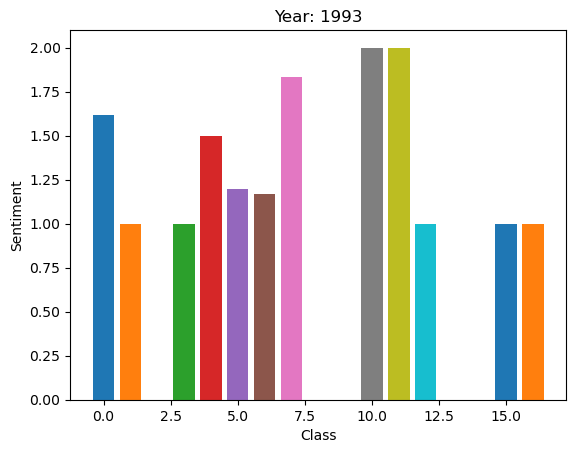

Should I show next Year:  Y


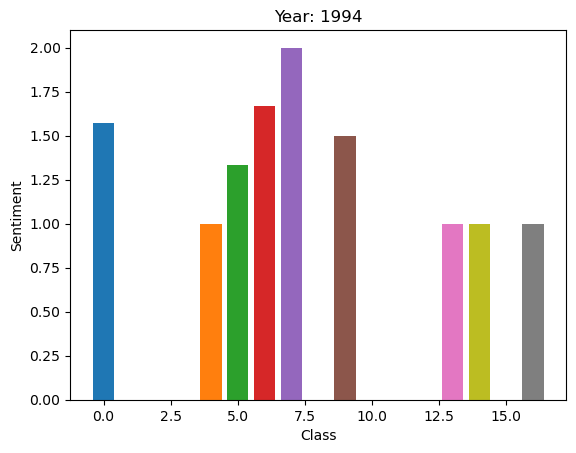

Should I show next Year:  Y


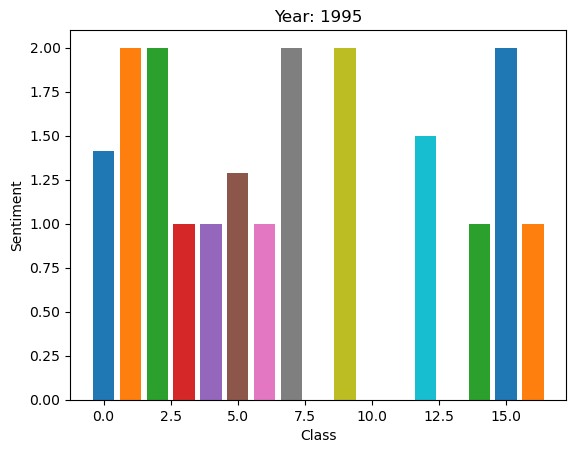

Should I show next Year:  Y


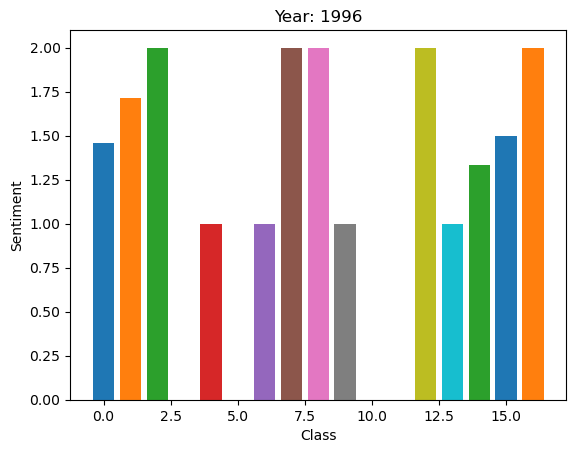

Should I show next Year:  Y


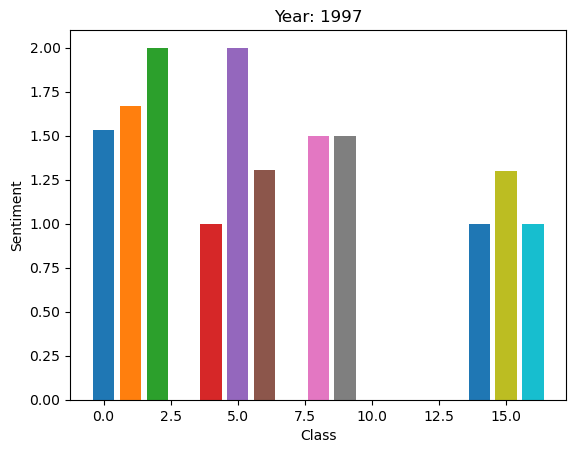

Should I show next Year:  Y


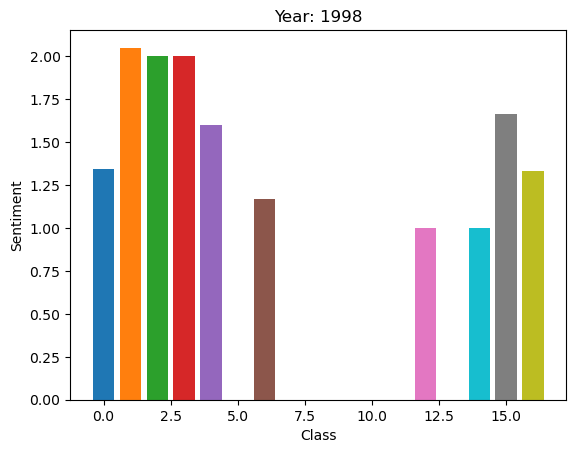

Should I show next Year:  Y


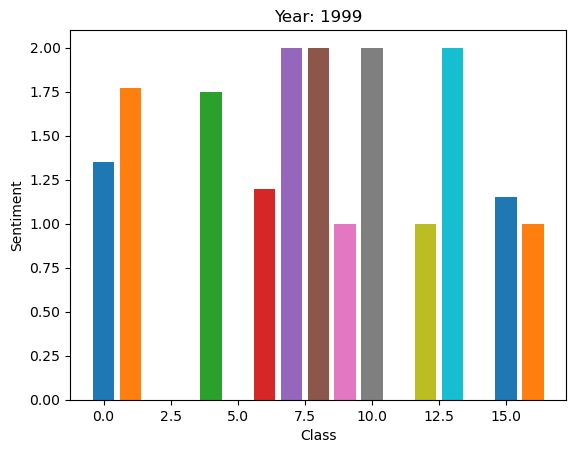

Should I show next Year:  Y


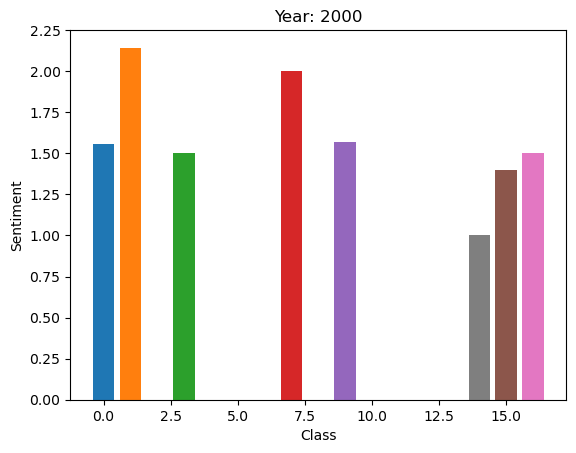

Should I show next Year:  Y


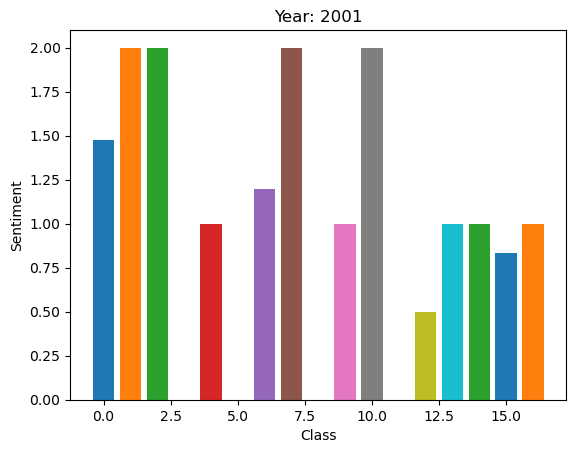

Should I show next Year:  Y


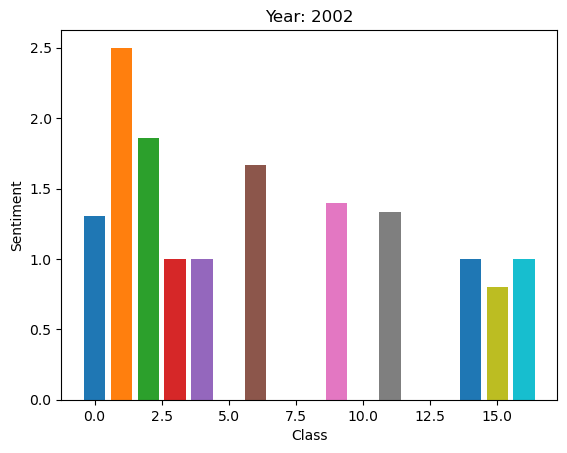

Should I show next Year:  Y


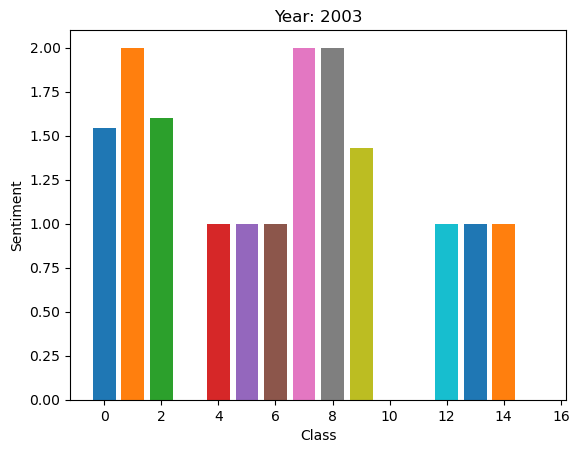

Should I show next Year:  Y


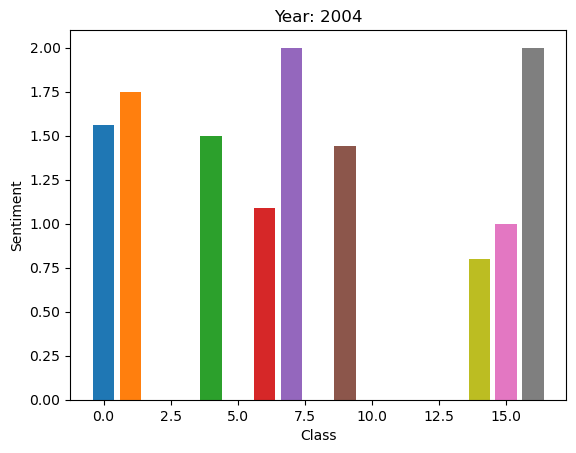

Should I show next Year:  Y


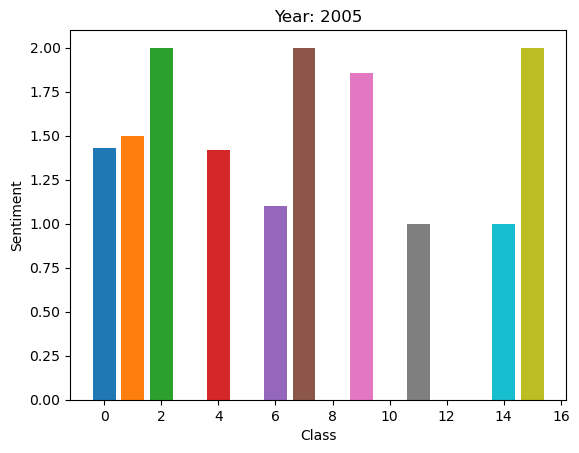

Should I show next Year:  Y


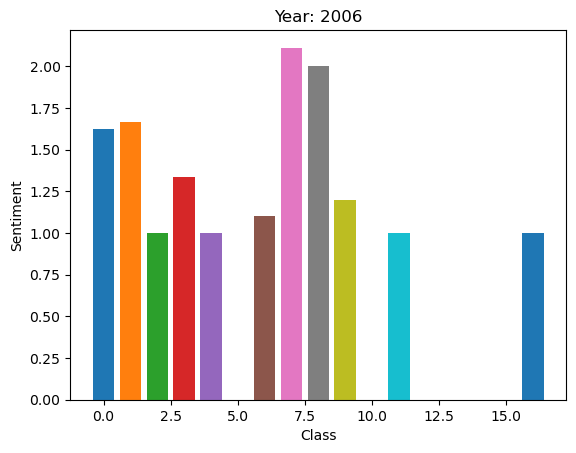

Should I show next Year:  Y


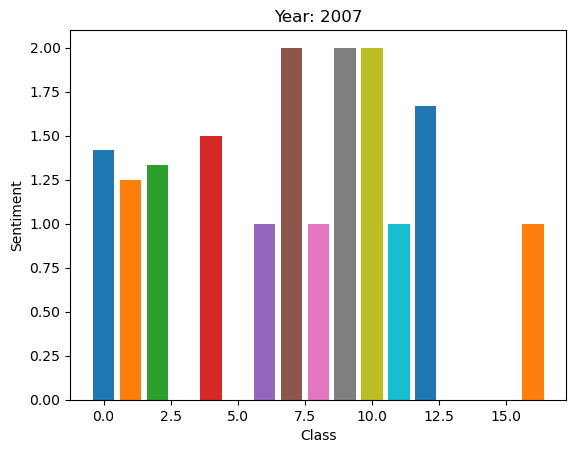

Should I show next Year:  Y


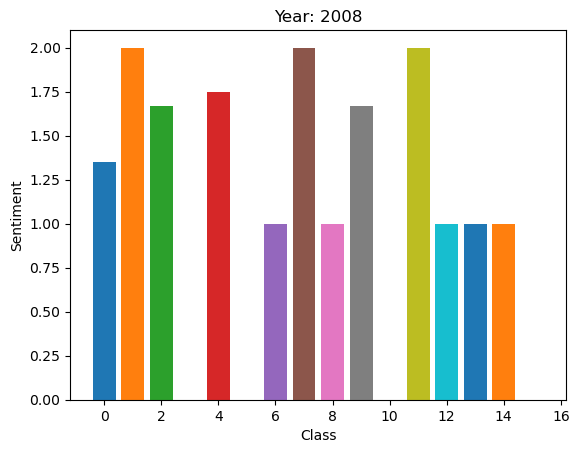

Should I show next Year:  Y


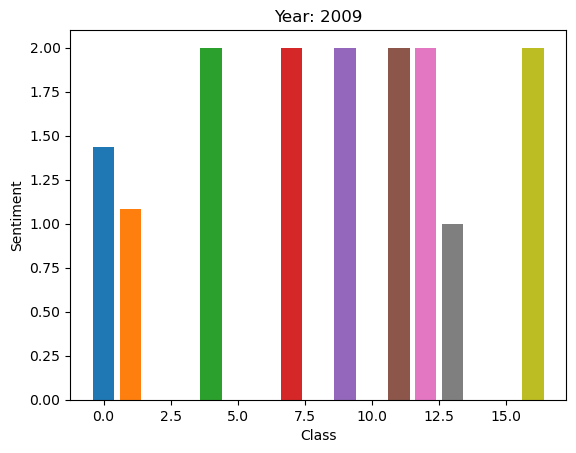

Should I show next Year:  Y


In [30]:
# class wise sentiment
year_dict
# year wise histogram
flag = False
for key, val in year_dict.items():
    for k, v in year_dict[key].items():
        v1 = year_count[key][k]
        if v1 == 0:
            plt.bar(k, 0)
        else:
            plt.bar(k, v/v1)
    plt.xlabel('Class')
    plt.ylabel('Sentiment')
    plt.title('Year: ' + str(key))
    plt.savefig(str(key)+'_class_wise_sentiment')
    plt.show()
    user_prompt = input("Should I show next Year: ")
    if not flag:
        if user_prompt == 'Y':
            continue
        elif user_prompt == 'N':
            break
        else:
            flag = True
    else:
        continue

Class 0


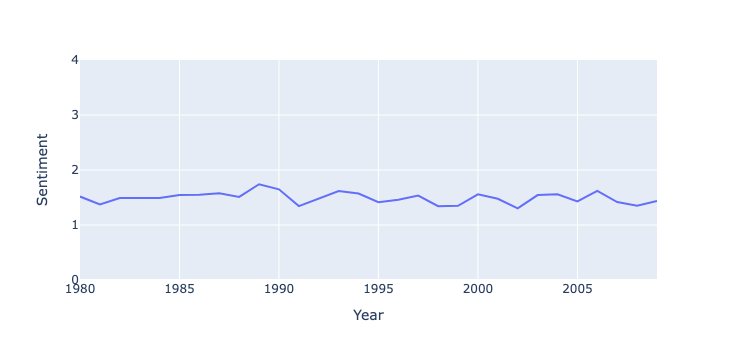

Class 1


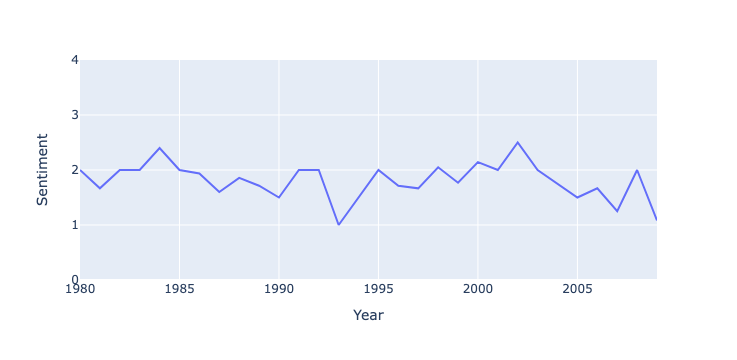

Class 2


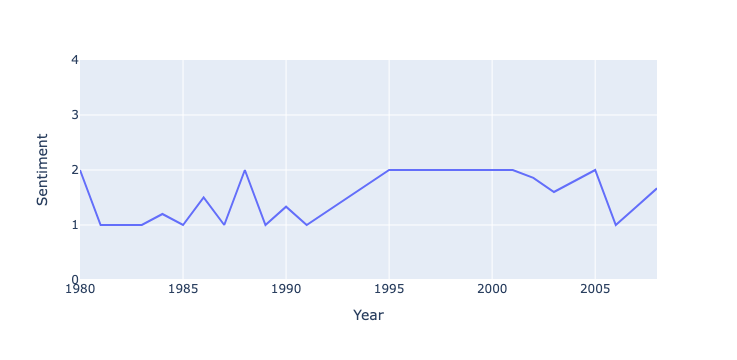

Class 3


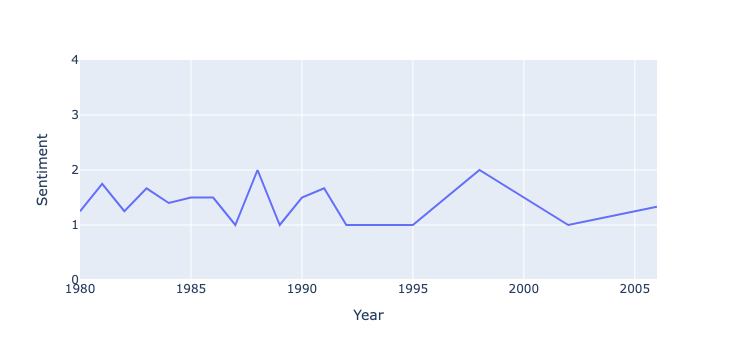

Class 4


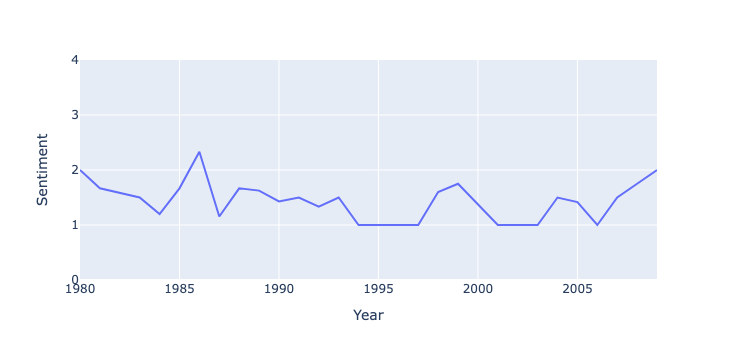

Class 5


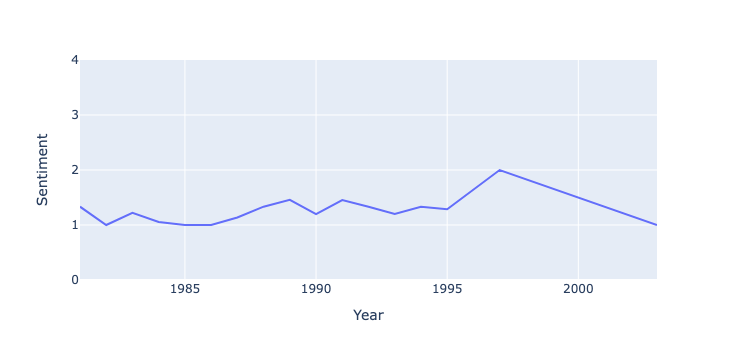

Class 6


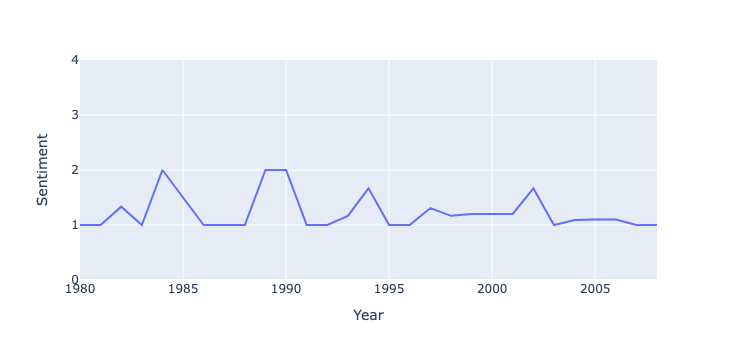

Class 7


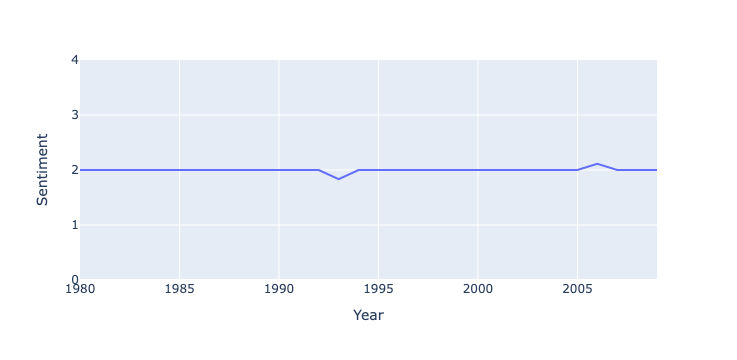

Class 8


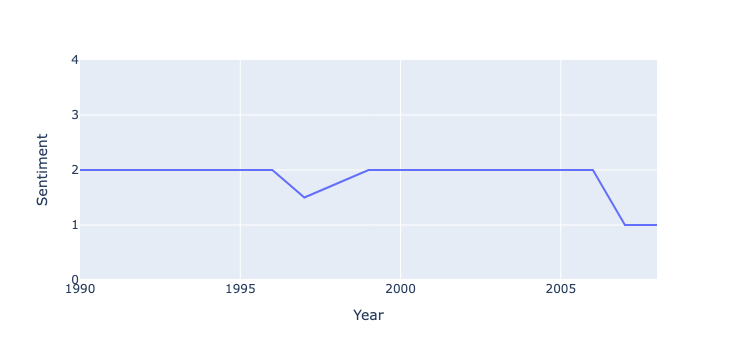

Class 9


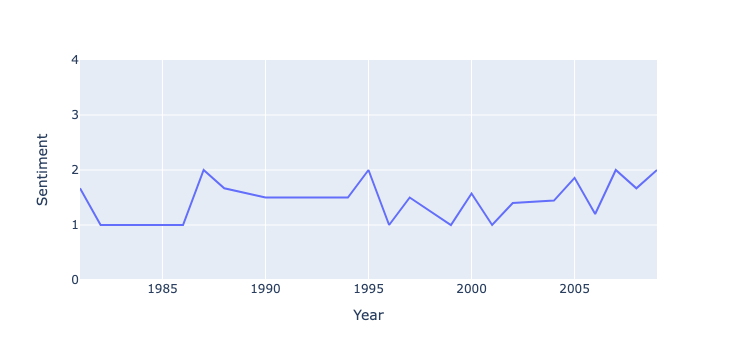

Class 10


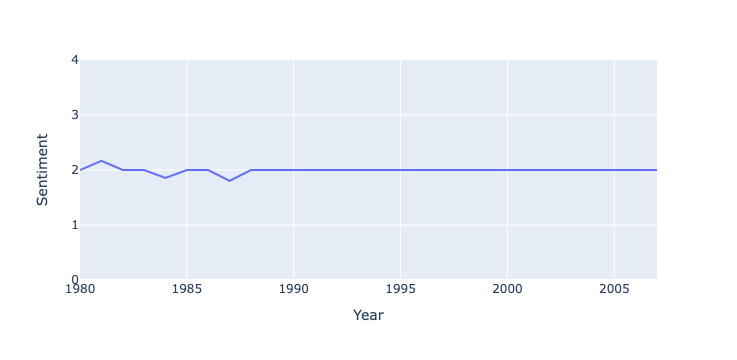

Class 11


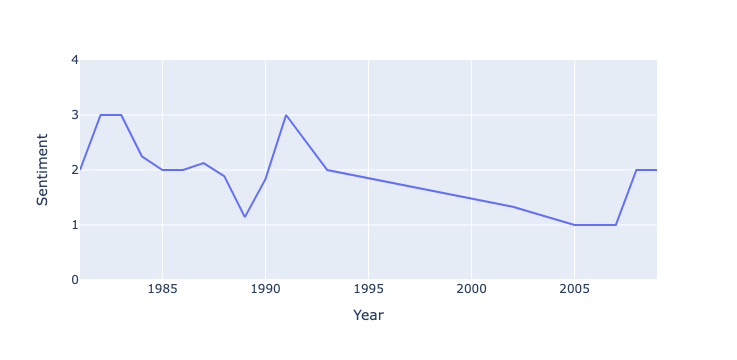

Class 12


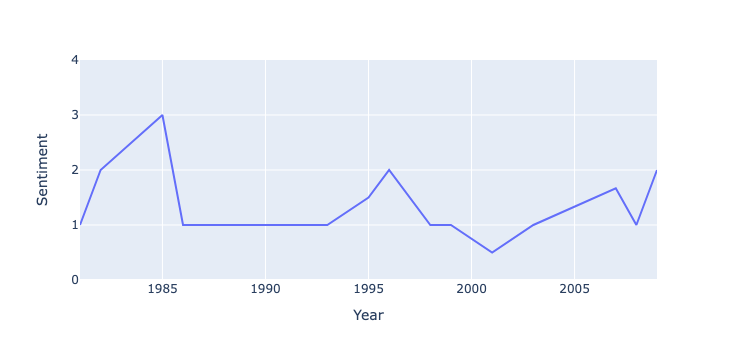

Class 13


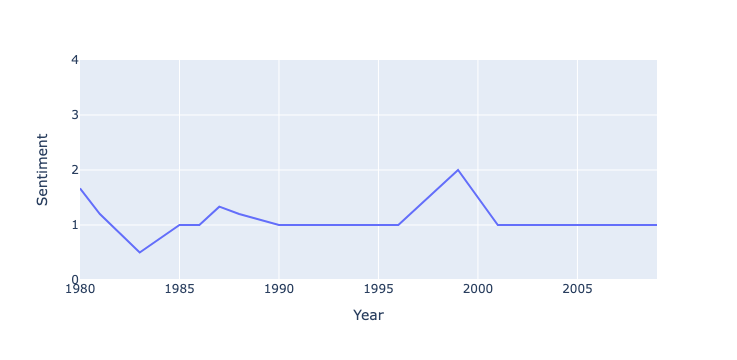

Class 14


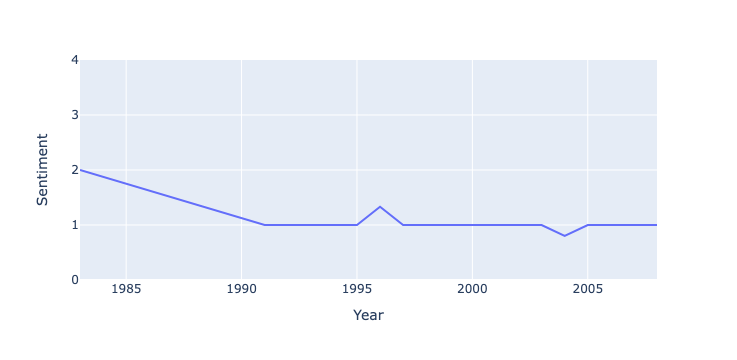

Class 15


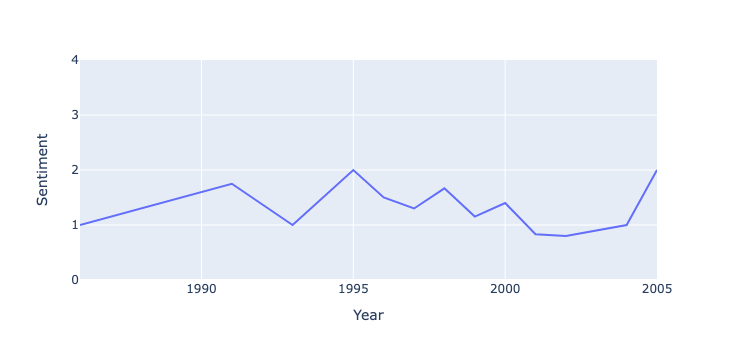

In [25]:
for i in range(16):
    print("Class " + str(i))
    fig = class_sentiment_change_yearly(i, year_dict, year_count)
    fig.write_html('class'+str(i)+'_yearly_sentiment_change.html')